## Курс "Анализ временных рядов"

### Задания 1,3,4

**Инструкции**  
Выбрать данные, например из  
https://data.open-power-system-data.org/time_series/,  
но отличающиеся от предложенных в примерах и провести их анализ как в примерах  
https://github.com/MVRonkin/TimeSeriesCourse/tree/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B8%202022%20%D0%B3%D0%BE%D0%B4  
результат представить в виде отчета. Отчет или в ворде или можно писать в ipynb, но сохранять в html или прикладывать ссылку, например в колаб или кагл.

### 1. Визуализация временных рядов


#### 1.1 Подготовка данных

Импорт необходимых библиотек

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns
sns.set_style('white')
sns.set(rc={'figure.figsize':(11, 4)})

Загрузка данных

In [3]:
# Download hourly data from OPSD website
url = 'https://data.open-power-system-data.org/time_series/2020-10-06/'
datafile = url + 'time_series_60min_singleindex.csv'
df_all = pd.read_csv(datafile, index_col='utc_timestamp', parse_dates=True, low_memory=False)
df_all.head()

cet_cest_timestamp  \
utc_timestamp                                         
2014-12-31 23:00:00+00:00  2015-01-01T00:00:00+0100   
2015-01-01 00:00:00+00:00  2015-01-01T01:00:00+0100   
2015-01-01 01:00:00+00:00  2015-01-01T02:00:00+0100   
2015-01-01 02:00:00+00:00  2015-01-01T03:00:00+0100   
2015-01-01 03:00:00+00:00  2015-01-01T04:00:00+0100   

                           AT_load_actual_entsoe_transparency  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00                                 NaN   
2015-01-01 00:00:00+00:00                              5946.0   
2015-01-01 01:00:00+00:00                              5726.0   
2015-01-01 02:00:00+00:00                              5347.0   
2015-01-01 03:00:00+00:00                              5249.0   

                           AT_load_forecast_entsoe_transparency  \
utc_timestamp                                                     
2014-12-31 23:00:00+00:00                                   NaN   
2015-01-01 00:00:00+00:00                                6701.0   
2015-01-01 01:00:00+00:00                                6593.0   
2015-01-01 02:00:00+00:00                                6482.0   
2015-01-01 03:00:00+00:00                                6454.0   

                           AT_price_day_ahead  AT_solar_generation_actual  \
utc_timestamp                                                               
2014-12-31 23:00:00+00:00                 NaN                         NaN   
2015-01-01 00:00:00+00:00                35.0                         NaN   
2015-01-01 01:00:00+00:00                45.0                         NaN   
2015-01-01 02:00:00+00:00                41.0                         NaN   
2015-01-01 03:00:00+00:00                38.0                         NaN   

                           AT_wind_onshore_generation_actual  \
utc_timestamp                                                  
2014-12-31 23:00:00+00:00                                NaN   
2015-01-01 00:00:00+00:00                               69.0   
2015-01-01 01:00:00+00:00                               64.0   
2015-01-01 02:00:00+00:00                               65.0   
2015-01-01 03:00:00+00:00                               64.0   

                           BE_load_actual_entsoe_transparency  \
utc_timestamp                                                   
2014-12-31 23:00:00+00:00                                 NaN   
2015-01-01 00:00:00+00:00                              9484.0   
2015-01-01 01:00:00+00:00                              9152.0   
2015-01-01 02:00:00+00:00                              8799.0   
2015-01-01 03:00:00+00:00                              8567.0   

                           BE_load_forecast_entsoe_transparency  \
utc_timestamp                                                     
2014-12-31 23:00:00+00:00                                   NaN   
2015-01-01 00:00:00+00:00                                9897.0   
2015-01-01 01:00:00+00:00                                9521.0   
2015-01-01 02:00:00+00:00                                9135.0   
2015-01-01 03:00:00+00:00                                8909.0   

                           BE_solar_generation_actual  \
utc_timestamp                                           
2014-12-31 23:00:00+00:00                         NaN   
2015-01-01 00:00:00+00:00                         NaN   
2015-01-01 01:00:00+00:00                         NaN   
2015-01-01 02:00:00+00:00                         NaN   
2015-01-01 03:00:00+00:00                         NaN   

                           BE_wind_generation_actual  ...  \
utc_timestamp                                         ...   
2014-12-31 23:00:00+00:00                        NaN  ...   
2015-01-01 00:00:00+00:00                        NaN  ...   
2015-01-01 01:00:00+00:00                     734.81  ...   
2015-01-01 02:00:00+00:00                     766.64  ...   
2015-01-01 03:00:00+00:00               

В качестве примера рассмотрим Данию. В качестве периода анализа возьмём период с 2015 по 2019 годы.

In [4]:
def extract_country(df_all, country_code, year_min=None, year_max=None):
    """Extract data for a single country"""
    
    # List of columns to extract
    columns = [col for col in df_all.columns if col.startswith(country_code)]
    
    # Extract columns and remove country codes from column labels
    columns_map = {col : col[3:] for col in columns}
    df_out = df_all[columns].rename(columns=columns_map)
    
    # Exclude years outside of specified range, if any
    if year_min is not None:
        df_out = df_out[df_out.index.year >= year_min]
    if year_max is not None:
        df_out = df_out[df_out.index.year <= year_max]
        
    return df_out
df_hrly = extract_country(df_all, country_code='DK', year_min=2015, year_max=2019)
df_hrly

load_actual_entsoe_transparency  \
utc_timestamp                                                
2015-01-01 00:00:00+00:00                              NaN   
2015-01-01 01:00:00+00:00                          3100.02   
2015-01-01 02:00:00+00:00                          2980.39   
2015-01-01 03:00:00+00:00                          2933.49   
2015-01-01 04:00:00+00:00                          2941.54   
...                                                    ...   
2019-12-31 19:00:00+00:00                          3785.27   
2019-12-31 20:00:00+00:00                          3582.21   
2019-12-31 21:00:00+00:00                          3438.26   
2019-12-31 22:00:00+00:00                          3309.25   
2019-12-31 23:00:00+00:00                          3315.91   

                           load_forecast_entsoe_transparency  solar_capacity  \
utc_timestamp                                                                  
2015-01-01 00:00:00+00:00                                NaN           489.0   
2015-01-01 01:00:00+00:00                             3126.8           489.0   
2015-01-01 02:00:00+00:00                             3019.0           489.0   
2015-01-01 03:00:00+00:00                             2976.3           489.0   
2015-01-01 04:00:00+00:00                             2982.5           489.0   
...                                                      ...             ...   
2019-12-31 19:00:00+00:00                             3776.0             NaN   
2019-12-31 20:00:00+00:00                             3585.0             NaN   
2019-12-31 21:00:00+00:00                             3430.0             NaN   
2019-12-31 22:00:00+00:00                             3303.0             NaN   
2019-12-31 23:00:00+00:00                             3214.0             NaN   

                           solar_generation_actual  wind_capacity  \
utc_timestamp                                                       
2015-01-01 00:00:00+00:00                      NaN         4643.0   
2015-01-01 01:00:00+00:00                      NaN         4643.0   
2015-01-01 02:00:00+00:00                      NaN         4643.0   
2015-01-01 03:00:00+00:00                      NaN         4643.0   
2015-01-01 04:00:00+00:00                     0.01         4643.0   
...                                            ...            ...   
2019-12-31 19:00:00+00:00                     0.00            NaN   
2019-12-31 20:00:00+00:00                     0.00            NaN   
2019-12-31 21:00:00+00:00                     0.00            NaN   
2019-12-31 22:00:00+00:00                     0.00            NaN   
2019-12-31 23:00:00+00:00                     0.00            NaN   

                           wind_generation_actual  wind_offshore_capacity  \
utc_timestamp                                                               
2015-01-01 00:00:00+00:00                     NaN                  1264.0   
2015-01-01 01:00:00+00:00                 2357.33                  1264.0   
2015-01-01 02:00:00+00:00                 2387.35                  1264.0   
2015-01-01 03:00:00+00:00                 2594.47                  1264.0   
2015-01-01 04:00:00+00:00                 3092.01                  1264.0   
...                                           ...                     ...   
2019-12-31 19:00:00+00:00                 1495.56                     NaN   
2019-12-31 20:00:00+00:00                 1158.63                     NaN   
2019-12-31 21:00:00+00:00                 1188.65                     NaN   
2019-12-31 22:00:00+00:00                 1466.09                     NaN   
2019-12-31 23:00:00+00:00                 1821.70                     NaN   

                           wind_offshore_generation_actual  \
utc_timestamp                                                
2015-01-01 00:00:00+00:00                              NaN   
2015-01-01 01:00:00+00:00                           902.71   
2015-01-01 02:00:00+00:00      

In [5]:
df_hrly.columns

Index(['load_actual_entsoe_transparency', 'load_forecast_entsoe_transparency',
       'solar_capacity', 'solar_generation_actual', 'wind_capacity',
       'wind_generation_actual', 'wind_offshore_capacity',
       'wind_offshore_generation_actual', 'wind_onshore_capacity',
       'wind_onshore_generation_actual', '1_load_actual_entsoe_transparency',
       '1_load_forecast_entsoe_transparency', '1_price_day_ahead',
       '1_solar_generation_actual', '1_wind_generation_actual',
       '1_wind_offshore_generation_actual', '1_wind_onshore_generation_actual',
       '2_load_actual_entsoe_transparency',
       '2_load_forecast_entsoe_transparency', '2_price_day_ahead',
       '2_solar_generation_actual', '2_wind_generation_actual',
       '2_wind_offshore_generation_actual',
       '2_wind_onshore_generation_actual'],
      dtype='object')

Выделим необходимые колонки

In [6]:
def transform_dataframe(df, cols_map):
    # Rename columns for convenience
    df = df[list(cols_map.keys())].rename(columns=cols_map)
    # Convert from MW to GW
    df = df / 1000
    df = df.resample('D').sum(min_count=24)
    df = df.rename_axis('Date')
    df.index = df.index.strftime('%Y-%m-%d')
    return df

cols_map = {'load_actual_entsoe_transparency' : 'Consumption',
            'wind_generation_actual' : 'Wind',
            'solar_generation_actual' : 'Solar'}
df_daily = transform_dataframe(df_hrly, cols_map)

# Compute wind + solar generation
df_daily['Wind+Solar'] = df_daily[['Wind', 'Solar']].sum(axis=1, skipna=False)
df_daily.to_csv('dk_dataset.csv')
df_daily.head()

Consumption      Wind    Solar  Wind+Solar
Date                                                  
2015-01-01          NaN       NaN      NaN         NaN
2015-01-02     96.64989  96.34663  0.29307    96.63970
2015-01-03     91.04580  76.64669  0.35168    76.99837
2015-01-04     89.72606  60.70700  0.61757    61.32457
2015-01-05    104.71102  18.68398  0.14711    18.83109

Теперь набор представляет собой ежедневное потребление электричества (в гига-Ваттах в час) в Дании. Набор включает следующие временные ряды в виде колонок:
* Date — дата в формате гггг-мм-дд;
* Consumption — Общее потребление, ГВт/ч;
* Wind — Потребление ветряной энергии, ГВт/ч;
* Solar — Потребление солнечной энергии, ГВт/ч;
* Wind+Solar — Потребление энергии из альтернативных источников, ГВт/ч.

Проведем анализ сформированного набора данных

In [7]:
path_ts = 'dk_dataset.csv'
df = pd.read_csv(path_ts)
df.sample(5, random_state=0)

Date  Consumption      Wind    Solar  Wind+Solar
793  2017-03-04     85.69030  40.95137  0.92237    41.87374
789  2017-02-28     95.57903  88.09379  1.19617    89.28996
118  2015-04-29     92.49923  41.08945  2.98833    44.07778
318  2015-11-15     82.15951   6.47174  0.44081     6.91255
891  2017-06-10     71.13556  20.54893  4.75242    25.30135

Размер набора данных

In [8]:
print(df.shape)

(1826, 5)


Информация о колонках в наборе   

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1826 non-null   object 
 1   Consumption  1825 non-null   float64
 2   Wind         1825 non-null   float64
 3   Solar        1825 non-null   float64
 4   Wind+Solar   1825 non-null   float64
dtypes: float64(4), object(1)
memory usage: 71.5+ KB


In [10]:
df.describe()

Consumption         Wind        Solar   Wind+Solar
count  1825.000000  1825.000000  1825.000000  1825.000000
mean     90.207099    38.210696     2.225584    40.436281
std      10.202049    24.831187     1.757699    24.452626
min      66.050700     0.976850     0.000000     1.721510
25%      83.633140    16.968720     0.600460    19.951080
50%      90.338150    34.251630     1.927590    36.469630
75%      97.167710    55.690280     3.457790    57.628310
max     116.532150   107.688550     6.762900   108.924180

In [11]:
df.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

Введение индексов-дат

In [12]:
df.Date = pd.to_datetime(df.Date)
df.set_index('Date', inplace=True)
df.sample(15, random_state=0)

Consumption      Wind    Solar  Wind+Solar
Date                                                  
2017-03-04     85.69030  40.95137  0.92237    41.87374
2017-02-28     95.57903  88.09379  1.19617    89.28996
2015-04-29     92.49923  41.08945  2.98833    44.07778
2015-11-15     82.15951   6.47174  0.44081     6.91255
2017-06-10     71.13556  20.54893  4.75242    25.30135
2017-06-03     74.47209  13.16449  3.27081    16.43530
2015-12-14    104.05258  15.07230  0.15431    15.22661
2019-10-15     93.78619  40.80392  1.48245    42.28637
2016-04-27     94.03118  40.73413  2.20810    42.94223
2015-01-07    106.31178  53.84539  0.52170    54.36709
2017-01-14     87.47213  45.55024  0.54142    46.09166
2019-08-17     79.93643  58.20715  3.25993    61.46708
2019-02-06    106.04869  40.93264  0.19341    41.12605
2015-07-11     70.97207   4.25849  2.84682     7.10531
2017-06-23     86.14076  36.50627  1.62948    38.13575

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2015-01-01 to 2019-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  1825 non-null   float64
 1   Wind         1825 non-null   float64
 2   Solar        1825 non-null   float64
 3   Wind+Solar   1825 non-null   float64
dtypes: float64(4)
memory usage: 71.3 KB


Отметим, что на самом деле можно было сразу загрузить данные в таком виде, чтобы индексы были датами

In [14]:
df = pd.read_csv(path_ts, parse_dates=['Date'], index_col="Date")
df.head()

Consumption      Wind    Solar  Wind+Solar
Date                                                  
2015-01-01          NaN       NaN      NaN         NaN
2015-01-02     96.64989  96.34663  0.29307    96.63970
2015-01-03     91.04580  76.64669  0.35168    76.99837
2015-01-04     89.72606  60.70700  0.61757    61.32457
2015-01-05    104.71102  18.68398  0.14711    18.83109


Данные обработанные в форме дат `DateTimeIndex` позволяют работать с индексом как с датой


In [15]:
print(df.index.day)
print(df.index.weekday)
print(df.index.year)

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='Date', length=1826)
Int64Index([3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
            ...
            6, 0, 1, 2, 3, 4, 5, 6, 0, 1],
           dtype='int64', name='Date', length=1826)
Int64Index([2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015, 2015,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='Date', length=1826)


Теперь мы можем обращаться к данным по дате

In [16]:
df.loc['2018-05-05']

Consumption    76.26778
Wind            6.78266
Solar           5.86570
Wind+Solar     12.64836
Name: 2018-05-05 00:00:00, dtype: float64

или по выборке дат

In [17]:
df.loc['2016-02-01':'2016-02-15']

Consumption      Wind    Solar  Wind+Solar
Date                                                  
2016-02-01    104.21035  67.17115  0.14137    67.31252
2016-02-02    102.32312  93.61966  0.34186    93.96152
2016-02-03    102.74736  80.63440  1.00841    81.64281
2016-02-04    103.19041  56.03411  1.48404    57.51815
2016-02-05    102.18050  35.62323  0.26570    35.88893
2016-02-06     87.96231  71.42854  0.18412    71.61266
2016-02-07     85.00001  75.73929  0.50317    76.24246
2016-02-08    100.59059  82.62051  0.38321    83.00372
2016-02-09    102.33787  48.09612  0.72464    48.82076
2016-02-10    105.42217  13.43759  0.60303    14.04062
2016-02-11    104.33135   5.24883  0.77989     6.02872
2016-02-12    101.41139   6.10072  1.28504     7.38576
2016-02-13     91.18902  10.56132  1.51235    12.07367
2016-02-14     89.30199  45.72549  0.99186    46.71735
2016-02-15    103.30955  30.47827  1.74013    32.21840

а также обращаться к конкретной колонке по дате

In [18]:
df.loc['2017-04-06':'2017-04-13', 'Wind']

Date
2017-04-06    61.78170
2017-04-07    70.37945
2017-04-08    37.93829
2017-04-09    39.45054
2017-04-10    92.19339
2017-04-11    74.23981
2017-04-12    77.21283
2017-04-13    72.09555
Name: Wind, dtype: float64

Или использовать колонку как переменную

In [19]:
df.Wind.loc['2015-10-10':'2015-10-15']

Date
2015-10-10    21.21473
2015-10-11    20.86417
2015-10-12    22.40435
2015-10-13    31.40655
2015-10-14    41.08649
2015-10-15    47.44076
Name: Wind, dtype: float64

а также к каждой колонке можно обращаться по ключу

In [20]:
df[['Solar']].loc['2015-10-10':'2015-10-15']

Solar
Date               
2015-10-10  1.39696
2015-10-11  1.42913
2015-10-12  0.78133
2015-10-13  0.54646
2015-10-14  0.85794
2015-10-15  1.24491

In [21]:
df['Solar'].loc['2015-10-10':'2015-10-15']

Date
2015-10-10    1.39696
2015-10-11    1.42913
2015-10-12    0.78133
2015-10-13    0.54646
2015-10-14    0.85794
2015-10-15    1.24491
Name: Solar, dtype: float64

также можно обращаться по индексу чрез метод iloc

In [22]:
df.iloc[0:3,0:2]

Consumption      Wind
Date                             
2015-01-01          NaN       NaN
2015-01-02     96.64989  96.34663
2015-01-03     91.04580  76.64669

Данные можно представлять с нужной частотой при помощи метода `asfreq`, например с частотой `D` - день, `W`,`M`,`Y` для недели, месяца и года соответственно.

In [23]:
df[['Solar']].loc['2016-02-10':'2017-04-15'].asfreq('M')

Solar
Date               
2016-02-29  1.98358
2016-03-31  3.24847
2016-04-30  2.82329
2016-05-31  3.71194
2016-06-30  2.89838
2016-07-31  3.33931
2016-08-31  3.44906
2016-09-30  1.91486
2016-10-31  0.45763
2016-11-30  0.12792
2016-12-31  0.07482
2017-01-31  0.20902
2017-02-28  1.19617
2017-03-31  2.86577

можно сделать обращение по месяцу с периодом 1 неделя

In [24]:
df.loc['2018-05'].asfreq('W')

Consumption      Wind    Solar  Wind+Solar
Date                                                  
2018-05-06     75.16361   9.26515  5.91289    15.17804
2018-05-13     75.03151  36.45607  5.82796    42.28403
2018-05-20     73.64655  10.13959  6.21081    16.35040
2018-05-27     76.80257  33.32256  3.90614    37.22870

или точно также с использованием открытой нотации обращения к массиву

In [25]:
df.loc['2016':].asfreq('Y')

Consumption      Wind    Solar  Wind+Solar
Date                                                  
2016-12-31     76.34516  81.12188  0.07482    81.19670
2017-12-31     92.44303  51.18440  0.11504    51.29944
2018-12-31     85.85817  56.29583  0.18597    56.48180
2019-12-31     89.13009  71.68673  0.86477    72.55150

Полагаем, что в данном случае будет визуально правильней поменять индексы на значение года

In [26]:
df.loc['2015':].asfreq('Y').set_index(df.loc['2015':].asfreq('Y').index.year)

Consumption      Wind    Solar  Wind+Solar
Date                                            
2015     86.18507  63.69894  0.12198    63.82092
2016     76.34516  81.12188  0.07482    81.19670
2017     92.44303  51.18440  0.11504    51.29944
2018     85.85817  56.29583  0.18597    56.48180
2019     89.13009  71.68673  0.86477    72.55150

Для индексов в формате дат также доступно группирование  методом ``` groupby```. Группирование ``` groupby``` происходит по заданным периодам, например `W`, 'Y' или `A` (год), `'2y'` (по 2 года) и т.д.


Часто после использования методов  ``` groupby```, ```asfreq```, а также ``` groupby``` используется некоторая функция итога, например,  `sum`, `mean`, `median` or `std`.  

In [27]:
df.groupby(pd.Grouper(freq='2m')).sum()

Consumption        Wind      Solar  Wind+Solar
Date                                                      
2015-01-31   3085.43823  1460.26244    8.58354  1468.84598
2015-03-31   5774.89735  2306.78099   64.21086  2370.99185
2015-05-31   5226.74881  2295.21562  167.88104  2463.09666
2015-07-31   4934.33166  1999.73906  176.35273  2176.09179
2015-09-30   5214.53855  1731.81147  142.92294  1874.73441
2015-11-30   5602.18904  2025.78916   41.16763  2066.95679
2016-01-31   6019.50134  3109.80954   18.06476  3127.87430
2016-03-31   5733.15777  1963.01926   90.40769  2053.42695
2016-05-31   5137.82708  1766.02073  205.56914  1971.58987
2016-07-31   4887.01526  1382.99733  214.52532  1597.52265
2016-09-30   5052.57257  1628.91446  173.08532  1801.99978
2016-11-30   5512.53921  2420.01203   48.80821  2468.82024
2017-01-31   5847.85763  2439.56383   22.91828  2462.48211
2017-03-31   5548.74049  2603.41411   79.95709  2683.37120
2017-05-31   5075.78239  2226.36389  217.80065  2444.16454
2017-07-31   4861.78931  2161.30334  224.53478  2385.83812
2017-09-30   5193.11058  1768.02586  161.51133  1929.53719
2017-11-30   5741.67917  2873.88389   59.15541  2933.03930
2018-01-31   6179.34923  3017.75073   24.14293  3041.89366
2018-03-31   6079.21239  2428.67642   83.93512  2512.61154
2018-05-31   5285.03489  1930.53424  272.75394  2203.28818
2018-07-31   5160.44305  1701.67903  321.78796  2023.46699
2018-09-30   5179.12468  2433.64554  188.80144  2622.44698
2018-11-30   5747.16083  2655.95716   75.14741  2731.10457
2019-01-31   6196.11428  3022.89122   24.85967  3047.75089
2019-03-31   5708.15141  3196.90414  111.70025  3308.60439
2019-05-31   5286.35070  2477.73711  278.90676  2756.64387
2019-07-31   5106.60422  2041.79621  288.49941  2330.29562
2019-09-30   5304.81754  2245.88043  201.46653  2447.34696
2019-11-30   5876.01182  2554.16218   60.32410  2614.48628
2020-01-31   3069.86406  1863.97907   11.90941  1875.88848

In [28]:
df.resample('2w').median().head(3)

Consumption       Wind     Solar  Wind+Solar
Date                                                    
2015-01-04    91.045800  76.646690  0.351680   76.998370
2015-01-18   105.905600  61.379795  0.159105   61.557600
2015-02-01   106.865025  19.658920  0.283890   20.134125

In [29]:
df.asfreq('1m').head(3)

Consumption      Wind    Solar  Wind+Solar
Date                                                  
2015-01-31     93.64658  16.34211  0.50194    16.84405
2015-02-28     88.02054  48.81416  1.47736    50.29152
2015-03-31    102.62608  50.85117  0.60240    51.45357

Уберем значения NaN

In [30]:
df.isna().sum()

Consumption    1
Wind           1
Solar          1
Wind+Solar     1
dtype: int64

In [31]:
df.fillna(0, inplace=True)
df.head(3)

Consumption      Wind    Solar  Wind+Solar
Date                                                  
2015-01-01      0.00000   0.00000  0.00000     0.00000
2015-01-02     96.64989  96.34663  0.29307    96.63970
2015-01-03     91.04580  76.64669  0.35168    76.99837

#### 1.2 Визуализация временного ряда


Для начала давайте посмотрим на наиболее простой тип визуализации для одного из столбцов наших данных

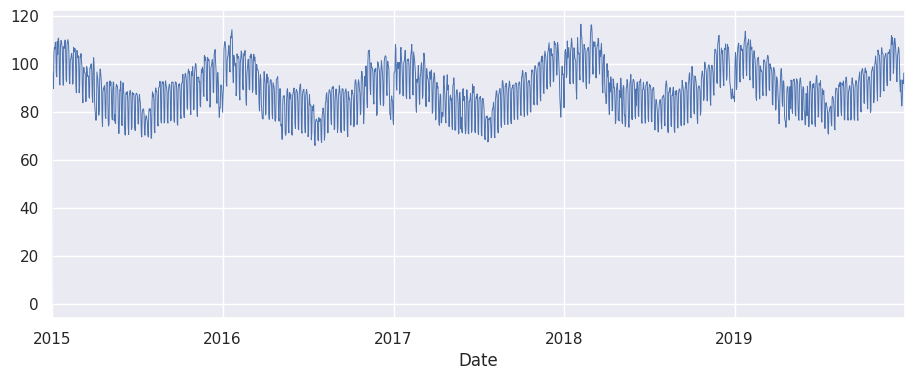

In [32]:
df['Consumption'].plot(linewidth=0.7);

В наших данных есть составляющее общего потребления, солнечной и ветряной энергии. Полагаем, что нам может потребоваться столбец, соответствующий другим источникам (не альтернативным).

In [33]:
df['Traditional'] = df['Consumption'] - df['Solar'] - df['Wind'] 

Также давайте попробуем визуализировать и остальные столбцы

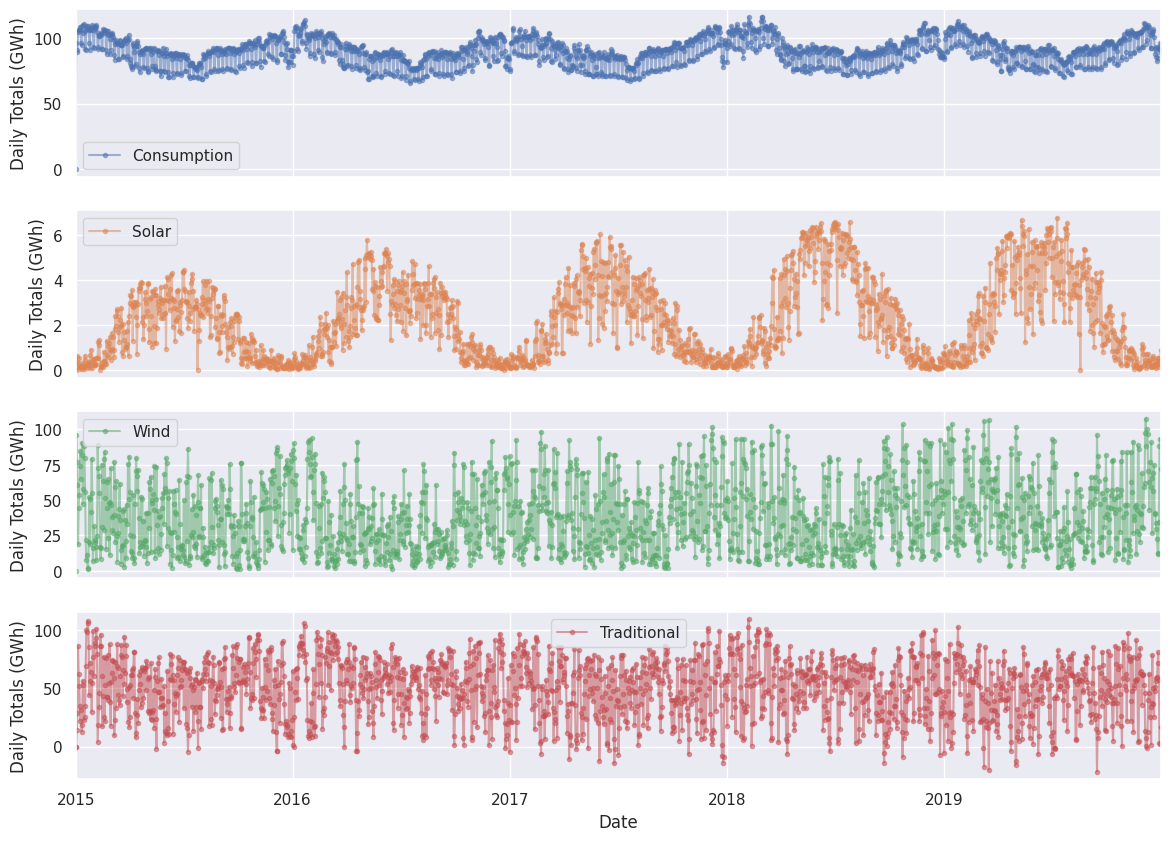

In [34]:
cols_plot = ['Consumption', 'Solar', 'Wind','Traditional']
axes = df[cols_plot].plot(marker='.', alpha=0.5, linestyle='-', figsize=(14, 10), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

Теперь попробуем провести визуализацию на одном графике, с периодом 1 месяц 

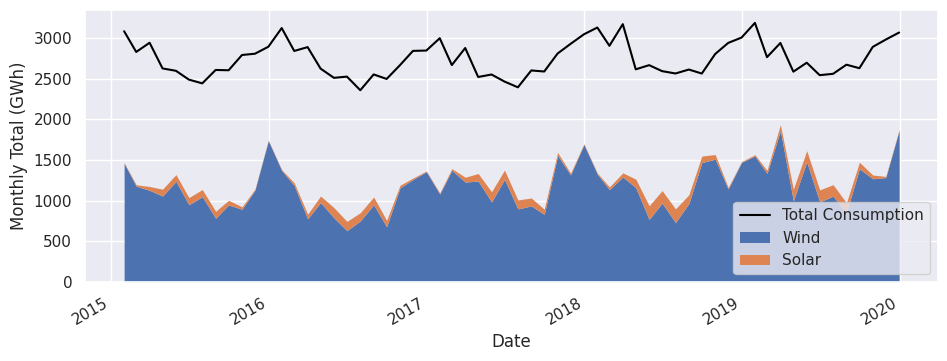

In [35]:
df_monthly = df.resample('M').sum(min_count=7)


fig, ax = plt.subplots()
ax.plot(df_monthly['Consumption'], color='black', label='Total Consumption')

df_monthly[['Wind', 'Solar']].plot.area(ax=ax, linewidth=0)

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)');



Анализ полученных графиков показывает следующее:
* Значения на всех графиках изменчивы в течение года, наиболее вероятна гипотеза, что это связано с сезонностью и изменением погоды. 
* Потребление электроэнергии выше зимой и ниже летом.
* Пик производства солнечной энергии приходится на лето.
* Пик производства ветряной энергии приходится на зиму, вероятнее всего это связано с погодным фактором.
* Значение альтернативных источников энергии растет, но очень медленно.
* Общее электропотребление, а также потребление из альтернативных источников имеют растущий тренд, тогда как тренд традиционных источников - спадающий.

Анализ общего потребления

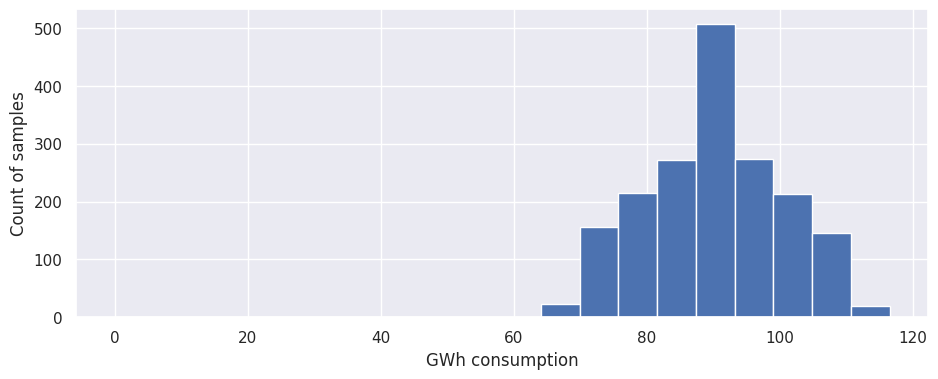

In [36]:
ax = df.Consumption.hist(bins=20)
# ax = df.Consumption.plot(kind='kde' )
ax.set_ylabel('Count of samples')
ax.set_xlabel('GWh consumption')
plt.show()

В распределении мы видим одну составляющую, пик которой приходится на 90 ГВт. 
   

построим график потребления для периода в 2 месяца, включая начала и конец года


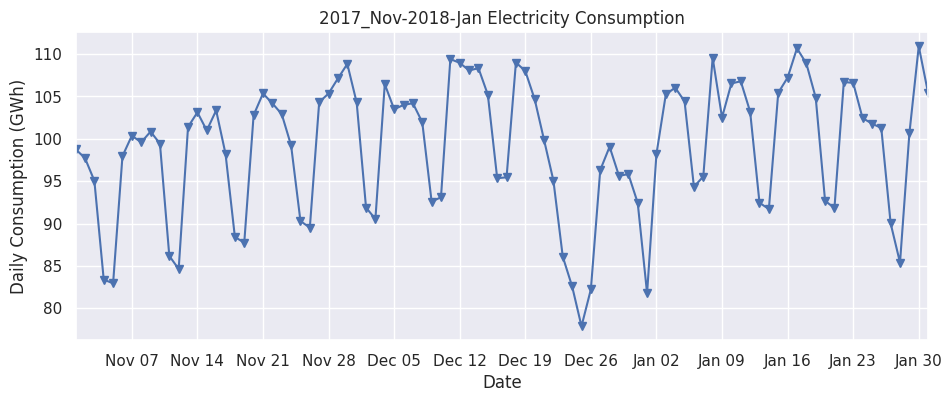

In [37]:
ax = df.loc['2017-11':'2018-01', 'Consumption'].plot(marker='v', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('2017_Nov-2018-Jan Electricity Consumption')

# For more convinient ticks (week ticks)
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
# Format 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.show()

Действительно у нас имеется две сезонных компоненты.  Спад потребления связан с выходными днями. Однако, потребление во время смены годов можно считать или аномалией или третьей составляющей (возможно это обусловлено рождественскими праздниками). Проверим гипотезу о 3 составляющей. Для этого используем скользящее среднее.

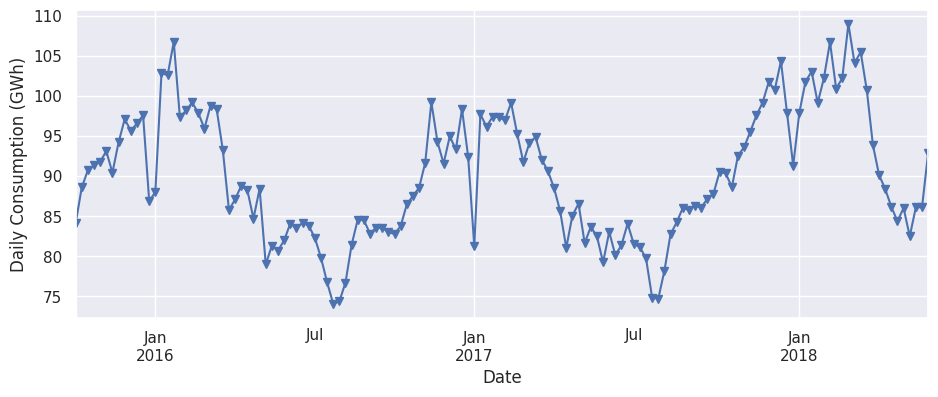

In [38]:
ax = df.loc['2015-10':'2018-05', 'Consumption'].\
    resample('W').mean().plot(marker='v', linestyle='-',linewidth=1.5)
ax.set_ylabel('Daily Consumption (GWh)')
plt.show()

Анализ потребления ветровой энергии

Также проверим наличие тренда у солнечной и ветровой составляющей (тут тренд не очевиден). Для этого используем скользящее вреднее при помощи метода `rolling`. Данный метод можно выполнить с заданным периодом, в частях года или днях.

<Axes: xlabel='Date'>

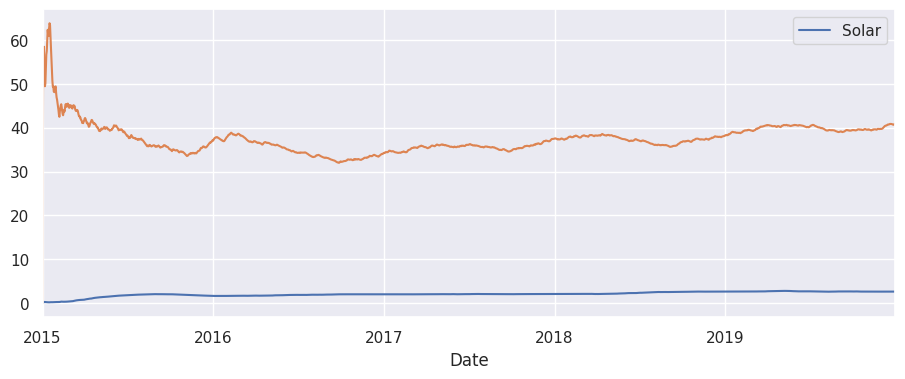

In [39]:
df[['Solar']].rolling('365d').mean().plot( linewidth=1.5, );
df.Wind.ewm(halflife=365, min_periods=0,adjust=True).mean().plot()

<Axes: xlabel='Date'>

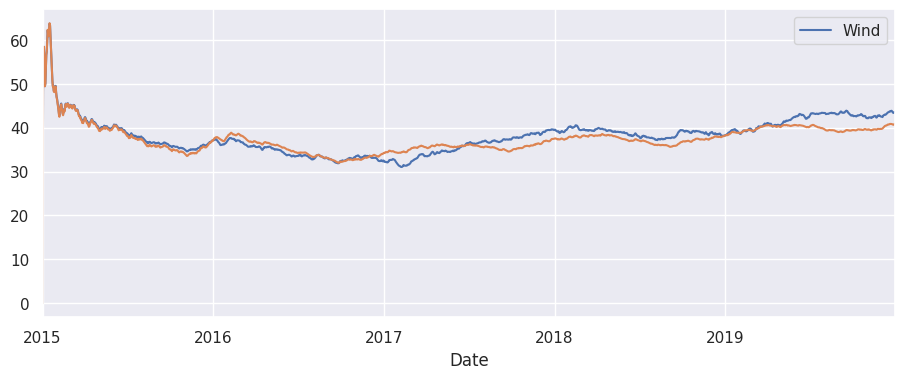

In [40]:
df[['Wind']].rolling('365d').mean().plot( linewidth=1.5, );
df.Wind.ewm(halflife=365, min_periods=0,adjust=True).mean().plot()



Также проверим тренд при помощи построения BBox

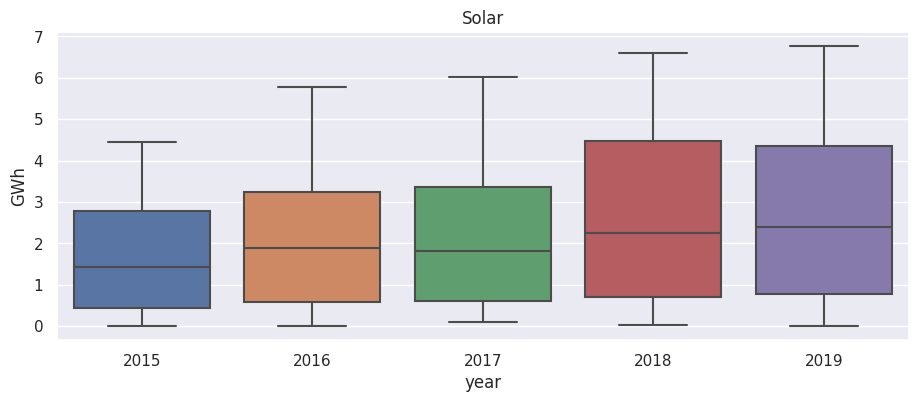

In [41]:
ax = sns.boxplot(data=df, x=df.index.year, y='Solar')
ax.set_ylabel('GWh')
ax.set_xlabel('year')
ax.set_title('Solar')
plt.show()

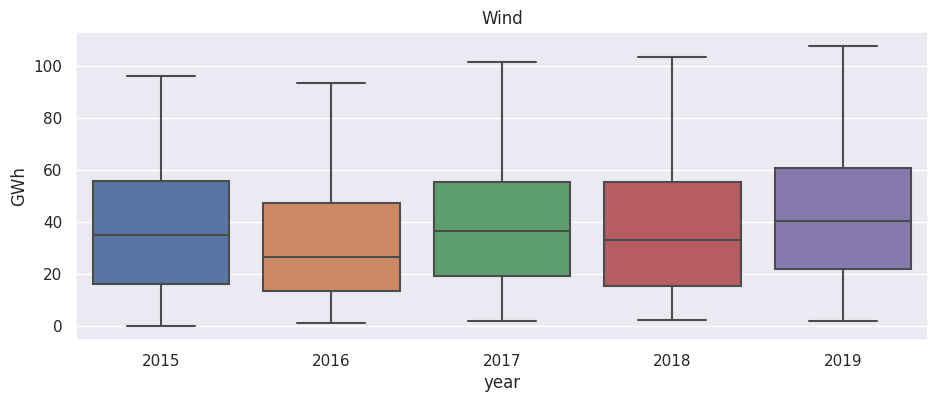

In [42]:
ax = sns.boxplot(data=df, x=df.index.year, y='Wind')
ax.set_ylabel('GWh')
ax.set_xlabel('year')
ax.set_title('Wind')
plt.show()


Отметим, что по мимо BBox можно также воспользоваться альтернативным отображением

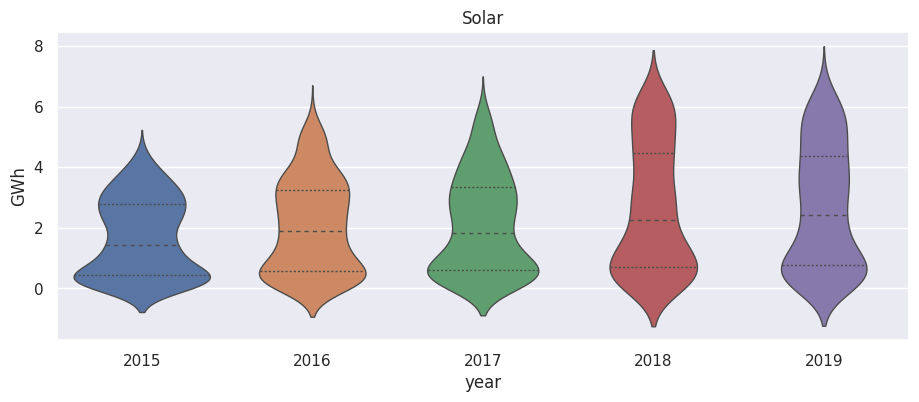

In [43]:
ax=sns.violinplot(data=df, x=df.index.year, y='Solar',
               split=True, inner="quart", linewidth=1, )
ax.set_ylabel('GWh')
ax.set_xlabel('year')
ax.set_title('Solar')
plt.show()

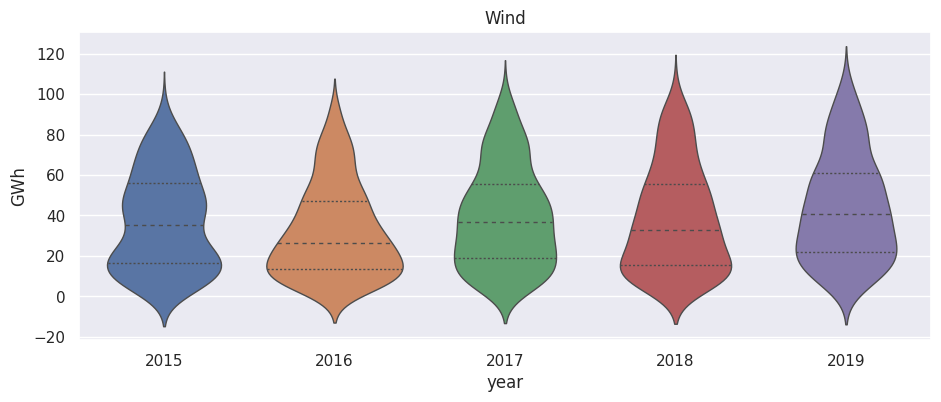

In [44]:
ax=sns.violinplot(data=df, x=df.index.year, y='Wind',
               split=True, inner="quart", linewidth=1, )
ax.set_ylabel('GWh')
ax.set_xlabel('year')
ax.set_title('Wind')
plt.show()

Однако, также можно проверить гипотезу при помощи bar-plot

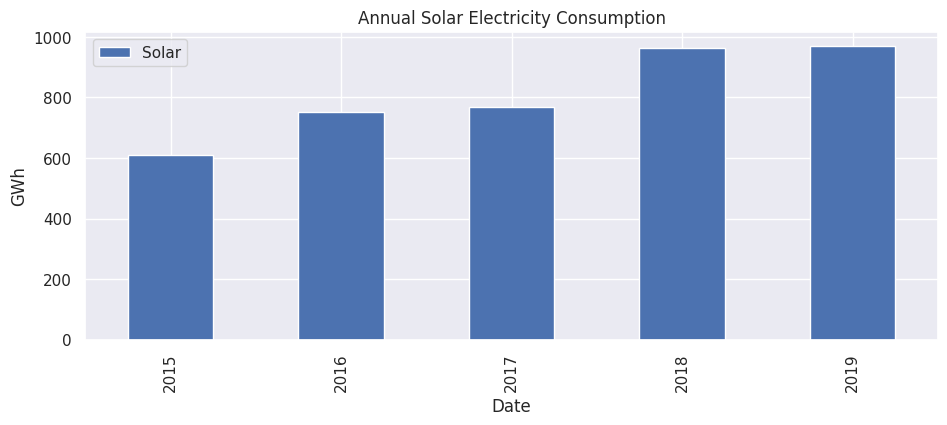

In [45]:
df_test = df[['Solar']].resample('Y').sum()

ax = df_test.set_index(df_test.index.year).plot.bar()
ax.set_title('Annual Solar Electricity Consumption')
ax.set_ylabel('GWh');

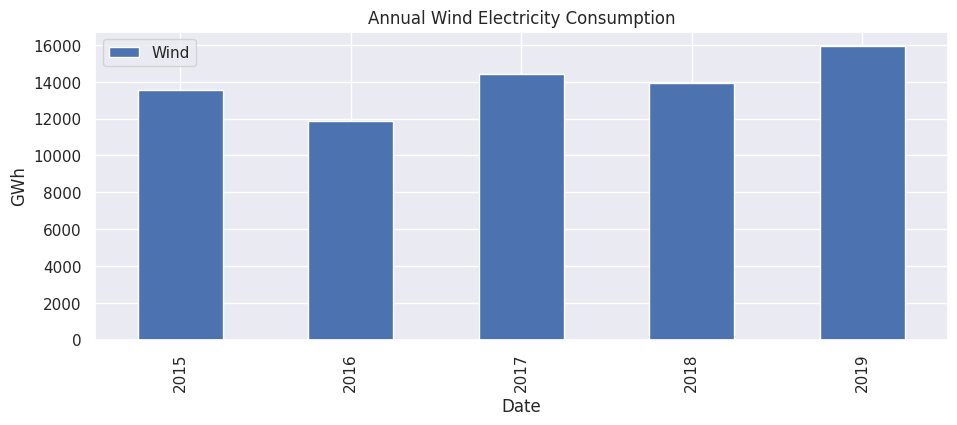

In [46]:
df_test = df[['Wind']].resample('Y').sum()

ax = df_test.set_index(df_test.index.year).plot.bar()
ax.set_title('Annual Wind Electricity Consumption')
ax.set_ylabel('GWh');


Также давайте проверим наличие сезонных составляющих у рядов с альтернативной энергией.

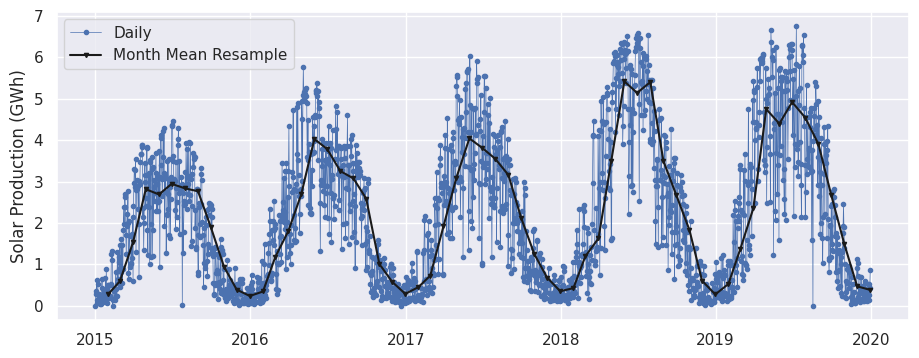

In [47]:
start, end = '2015-01', '2019-12'

fig, ax = plt.subplots()
ax.plot(df.loc[start:end, 'Solar'],marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df.resample('M').mean().loc[start:end, 'Solar'], marker='v', markersize=3, linestyle='-', label='Month Mean Resample', color='k')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

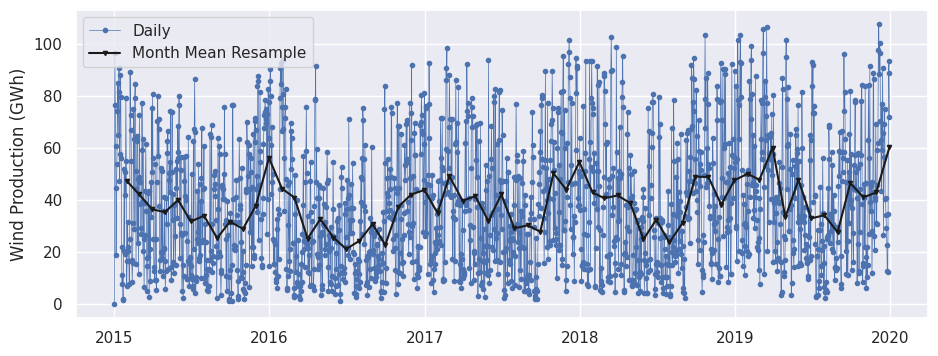

In [48]:
start, end = '2015-01', '2019-12'

fig, ax = plt.subplots()
ax.plot(df.loc[start:end, 'Wind'],marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(df.resample('M').mean().loc[start:end, 'Wind'], marker='v', markersize=3, linestyle='-', label='Month Mean Resample', color='k')
ax.set_ylabel('Wind Production (GWh)')
ax.legend();

Вероятно, сезонность нестабильна, чтобы это проверить давайте построим boxplot месячных значений

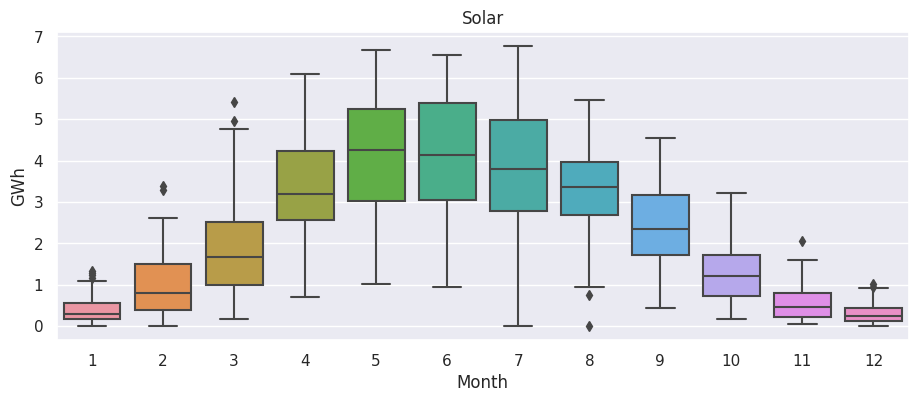

In [49]:
ax = sns.boxplot(data=df, x=df.index.month, y='Solar')
ax.set_ylabel('GWh')
ax.set_xlabel('Month')
ax.set_title('Solar')
plt.show()

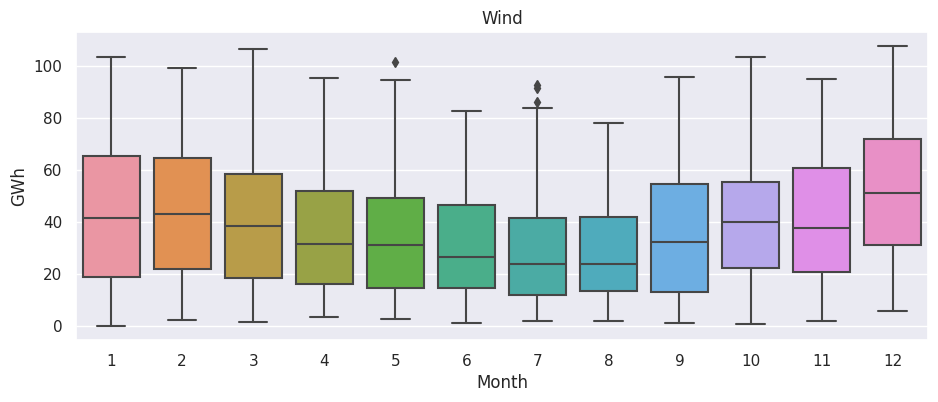

In [50]:
ax = sns.boxplot(data=df, x=df.index.month, y='Wind')
ax.set_ylabel('GWh')
ax.set_xlabel('Month')
ax.set_title('Wind')
plt.show()

На boxplot видим четкую сезонность генерации по каждому из альтернативных источников, а также некоторое количество выбросов, изменения среднего значения и дисперсии

В дополнение мы можем проверить нестационарность сезонности солнечной и ветровой составляющей с использованием скользящего среднего по годам.

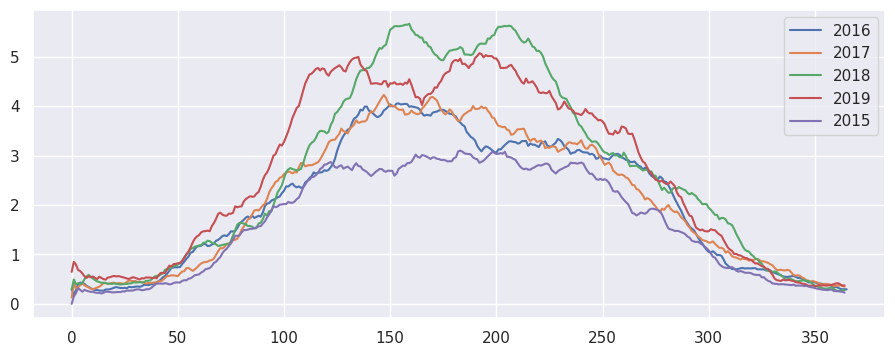

In [51]:
for year in list(set(df.index.year)):
    plt.plot(df.loc[str(year):str(year), 'Solar'].rolling('30d').mean().values, label=year)
plt.legend()    

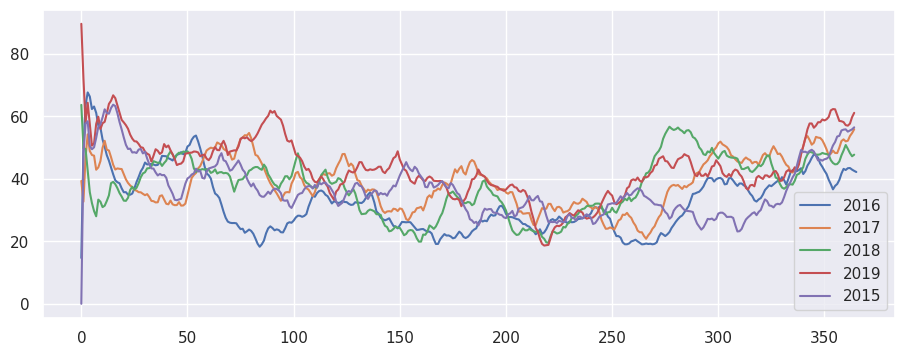

In [52]:
for year in list(set(df.index.year)):
    plt.plot(df.loc[str(year):str(year), 'Wind'].rolling('30d').mean().values, label=year)
plt.legend()    

Вероятно, нестационарность сезонности увеличивается от года к году.   Также оценим сезонность дней недели. 

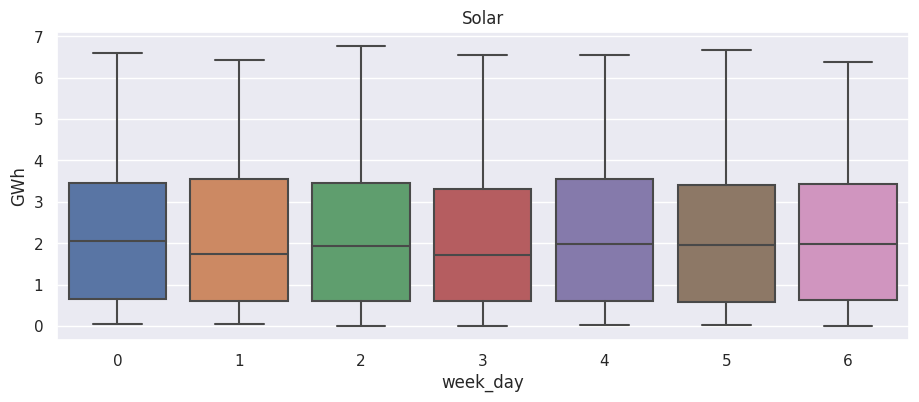

In [53]:
ax = sns.boxplot(data=df, x=df.index.weekday, y='Solar');
ax.set_ylabel('GWh')
ax.set_xlabel('week_day')
ax.set_title('Solar')
plt.show()

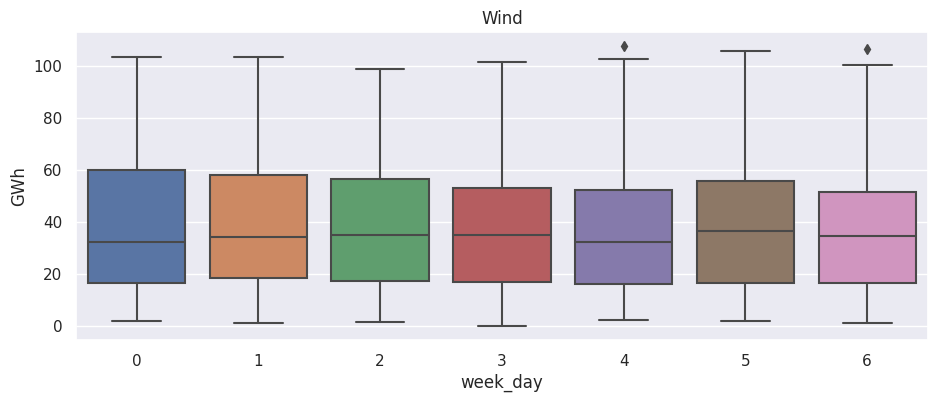

In [54]:
ax = sns.boxplot(data=df, x=df.index.weekday, y='Wind');
ax.set_ylabel('GWh')
ax.set_xlabel('week_day')
ax.set_title('Wind')
plt.show()

на графике не видно явной сезонности или нестационарности, однако число выбросов достаточно большое.
    

### 3. Предсказания

In [55]:
! pip install --upgrade sktime[all_extras]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
import sktime
import numpy as np

In [57]:
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import (
    EnsembleForecaster,
    MultiplexForecaster,
    TransformedTargetForecaster,
    make_reduction,
)
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.model_selection import (
    ExpandingWindowSplitter,
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
    temporal_train_test_split,
)
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.performance_metrics.forecasting import  MeanAbsolutePercentageError, MeanSquaredError
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.utils.plotting import plot_series
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor
from sktime.forecasting.fbprophet import Prophet
from sktime.forecasting.tbats import TBATS
smape = MeanAbsolutePercentageError(symmetric = True)
rmse  = MeanSquaredError(square_root=True)

from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier

r2_score = lambda y_pred, y_test: 1-np.sum(np.square(y_pred - y_test))/np.sum(np.square(y_test - np.mean(y_test)))
%matplotlib inline

In [58]:
path_ts = 'dk_dataset.csv'
df = pd.read_csv(path_ts, parse_dates=['Date'], index_col="Date")
df=df.fillna(df.mean())
df.head()

Consumption       Wind     Solar  Wind+Solar
Date                                                    
2015-01-01    90.207099  38.210696  2.225584   40.436281
2015-01-02    96.649890  96.346630  0.293070   96.639700
2015-01-03    91.045800  76.646690  0.351680   76.998370
2015-01-04    89.726060  60.707000  0.617570   61.324570
2015-01-05   104.711020  18.683980  0.147110   18.831090

В первую очередь будем рассматривать однопеременные методы (`univariate time series`). Поэтому выберем один из столбцов данных в качестве отдельного временного ряда.

In [59]:
y = df.Consumption.asfreq('7d')
y.head()

Date
2015-01-01     90.207099
2015-01-08    109.068900
2015-01-15    110.772630
2015-01-22    108.009360
2015-01-29    109.978770
Freq: 7D, Name: Consumption, dtype: float64

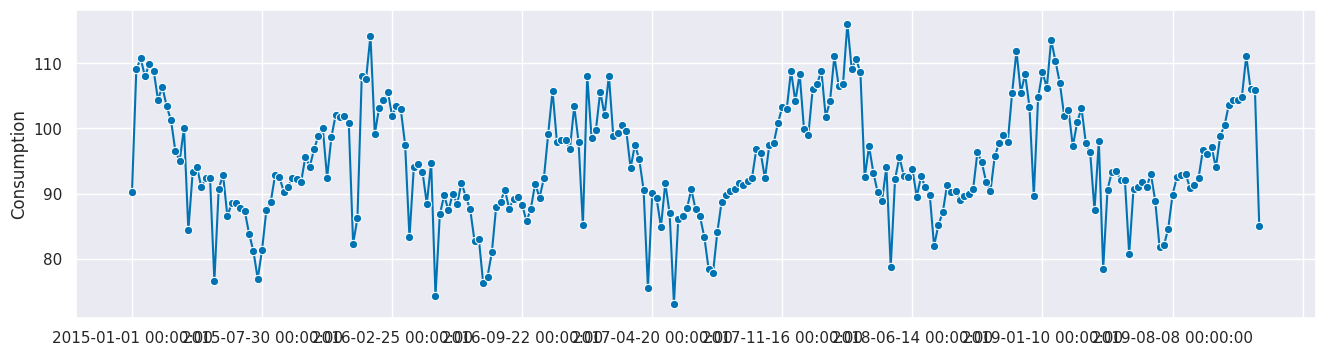

In [60]:
sktime.utils.plotting.plot_series(y);

Для разделения данных воспользуемся функцией `temporal_train_test_split`, которая позволяет адаптировать разделение данных не разрушая временные зависимости в данных.

Check splitted data size: Train: 183, Test: 78


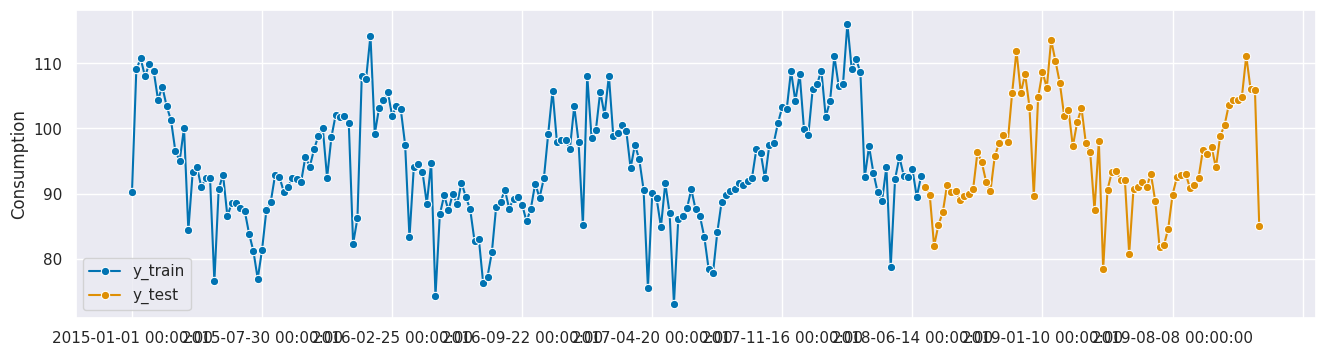

In [61]:
TEST_SIZE = int(0.3*y.size)
y_train, y_test = temporal_train_test_split(y, test_size=TEST_SIZE)
print(f'Check splitted data size: Train: {y_train.shape[0]}, Test: {y_test.shape[0]}')
sktime.utils.plotting.plot_series(y_train, y_test, labels=["y_train", "y_test"]);

Для начала давайте попробуем выполнить наивное предсказание. То есть каждое следующее предсказанное значение будет лишь копией предыдущего, начиная с последнего значение тренировочной выборки.

sMAPE = 0.068


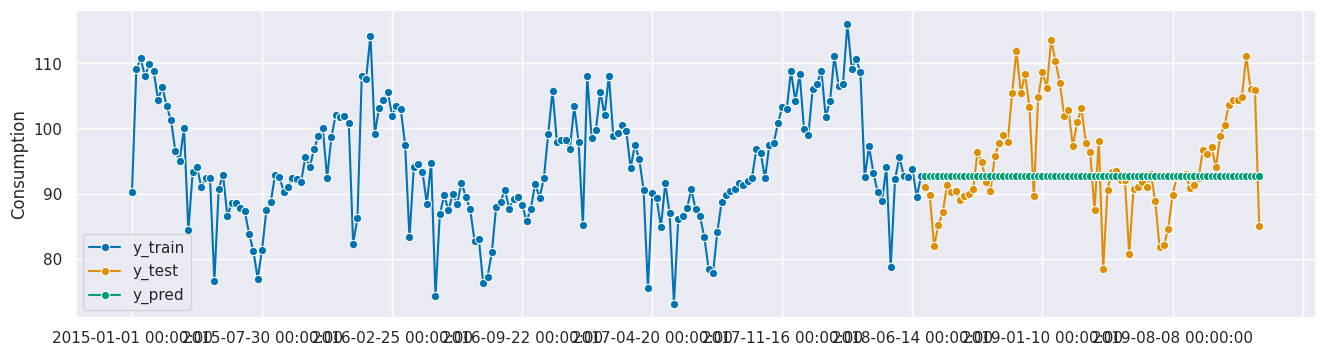

In [62]:
# ГОРИЗОНТ
#fh = np.arange(y_test.size) + 1
fh = ForecastingHorizon(y_test.index, is_relative=False)

# ПРЕДСКАЗАТЕЛЬ
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y_train)

# ПРЕДСКАЗАНИЕ
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

# ОШИБКА
print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

Попробуем оценить точность наивного сезонного предсказания.

sMAPE = 0.040


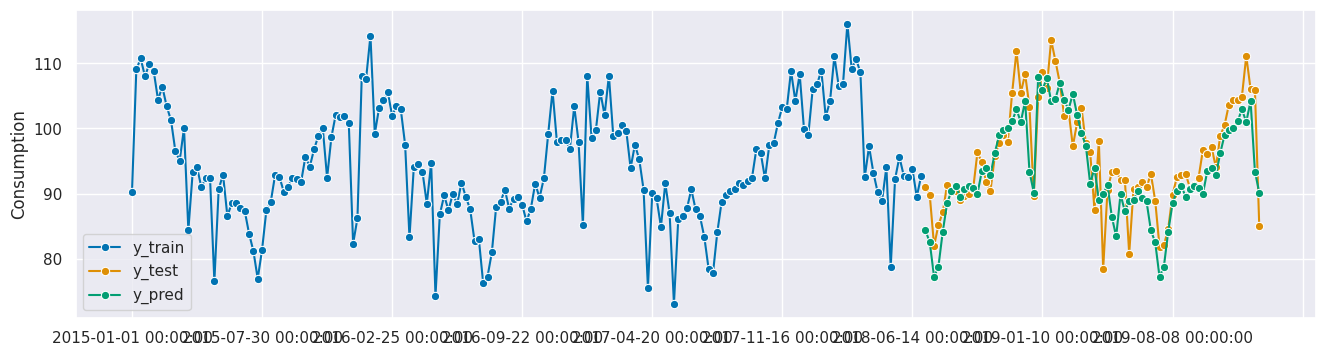

In [63]:
SEASON = 52

forecaster = NaiveForecaster(strategy="mean", sp=SEASON)
forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

Более продвинутым вариантом предсказателей является Семейство методов на основе экспоненциального сглаживания

sMAPE = 0.069


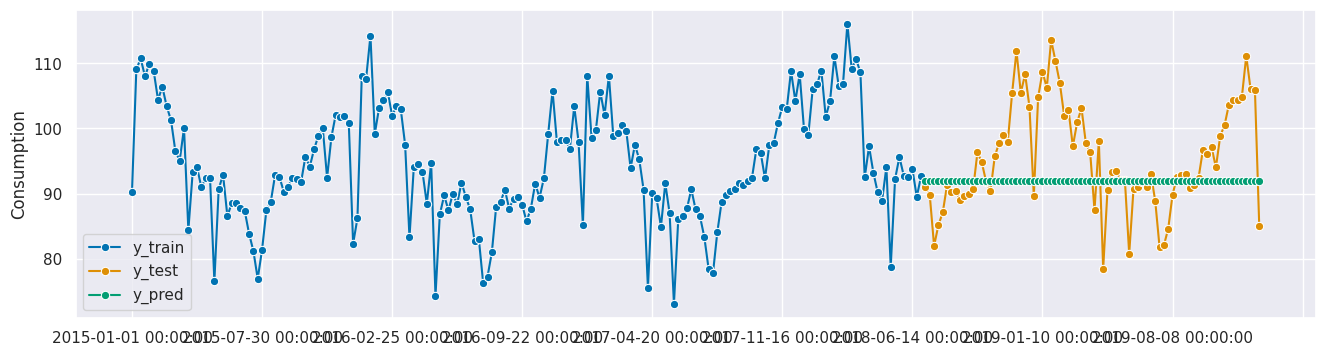

In [64]:
forecaster = ExponentialSmoothing()
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

sMAPE = 0.076


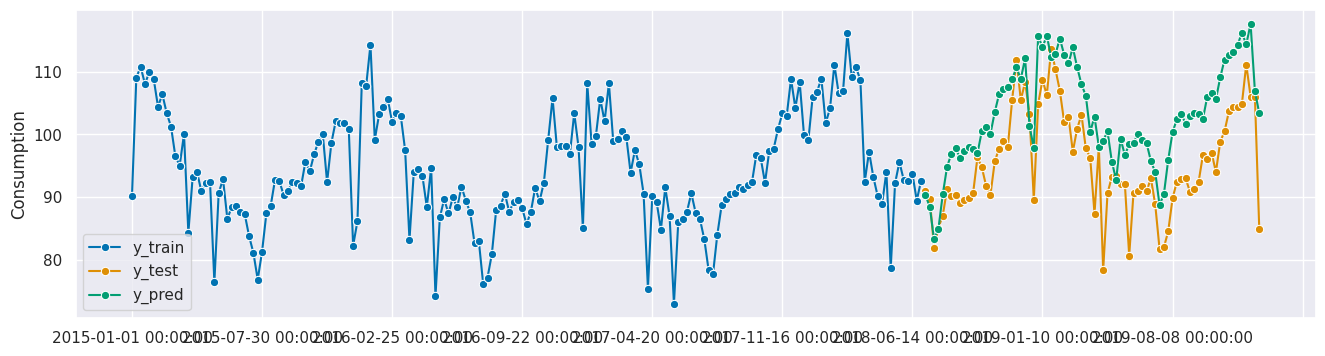

In [65]:
SEASON = 52

# МЕТОДЫ
ses         = ExponentialSmoothing(sp=SEASON)
holt        = ExponentialSmoothing(trend="add", damped_trend=False,  sp=SEASON)
damped_holt = ExponentialSmoothing(trend="add", damped_trend=True,   sp=SEASON)
holt_winter = ExponentialSmoothing(trend="add", seasonal="additive", sp=SEASON)
holt_winter_add_boxcox  = ExponentialSmoothing(trend="add", seasonal="additive", use_boxcox =True, sp=SEASON)
holt_winter_mul_boxcox  = ExponentialSmoothing(trend="mul", seasonal="additive", use_boxcox =True, sp=SEASON)
holt_winter_sadd_boxcox = ExponentialSmoothing(trend="add", seasonal="mul", use_boxcox =True, sp=SEASON)
holt_winter_smul_boxcox = ExponentialSmoothing(trend="mul", seasonal="mul", use_boxcox =True, sp=SEASON)



forecaster = holt_winter

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')


Точность в предыдущих случаях оставляла желать лучшего. Однако, теперь давайте посмотрим на работу более сложных методов экспоненциального сглаживания.

sMAPE = 0.079


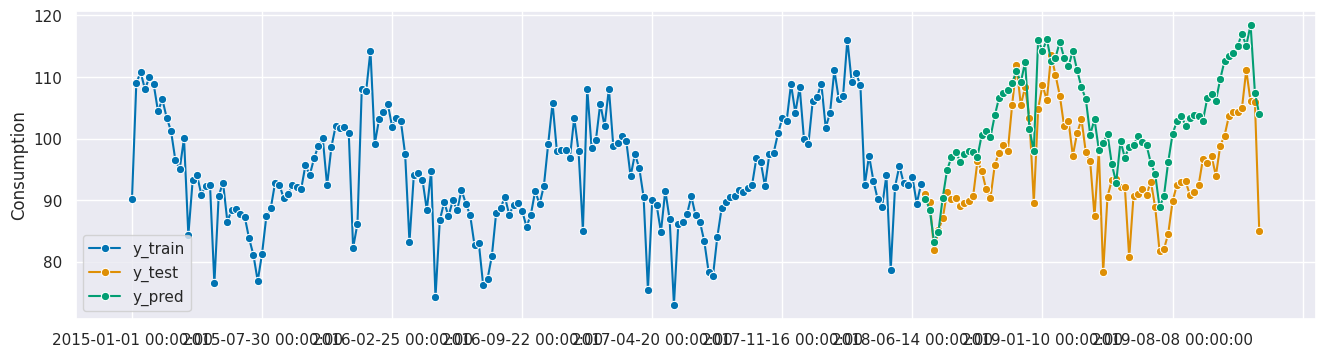

In [66]:
SEASON = 52

# МЕТОДЫ
ses         = ExponentialSmoothing(sp=SEASON)
holt        = ExponentialSmoothing(trend="add", damped_trend=False,  sp=SEASON)
damped_holt = ExponentialSmoothing(trend="add", damped_trend=True,   sp=SEASON)
holt_winter = ExponentialSmoothing(trend="add", seasonal="additive", sp=SEASON)
holt_winter_add_boxcox  = ExponentialSmoothing(trend="add", seasonal="additive", use_boxcox =True, sp=SEASON)
holt_winter_mul_boxcox  = ExponentialSmoothing(trend="mul", seasonal="additive", use_boxcox =True, sp=SEASON)
holt_winter_sadd_boxcox = ExponentialSmoothing(trend="add", seasonal="mul", use_boxcox =True, sp=SEASON)
holt_winter_smul_boxcox = ExponentialSmoothing(trend="mul", seasonal="mul", use_boxcox =True, sp=SEASON)

# ПРЕДСКАЗАТЕЛЬ
forecaster = EnsembleForecaster(
    [
#         ("ses", ses),
#         ("holt", holt),
#         ("damped", damped_holt),
        ("holt-winter",holt_winter),
#         ("holt-winter, additive trend, box-cox", holt_winter_add_boxcox),
        ("holt-winter, multiplicative trend, box-cox", holt_winter_mul_boxcox),
#         ("holt-winter, multiplicative season, box-cox", holt_winter_sadd_boxcox),
#         ("holt-winter, multiplicative both,   box-cox", holt_winter_smul_boxcox)        
    ]
)
forecaster.fit(y_train)

# ПРЕДСКАЗАНИЕ
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

# РЕЗУЛЬТАТ
print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

Применим методы из пакета `AutoETS`

sMAPE = 0.037


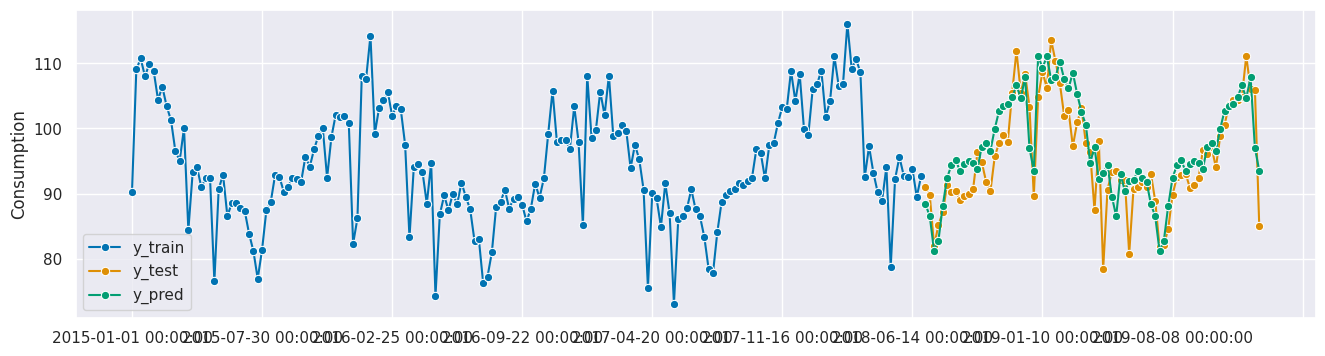

In [67]:
from sktime.forecasting.ets import AutoETS

forecaster = AutoETS(auto=True, sp=SEASON, n_jobs=-1)

forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

Другим методом оценки данных с вилянием сезонности и тренда является использование предварительной декомпозиции временного ряда.

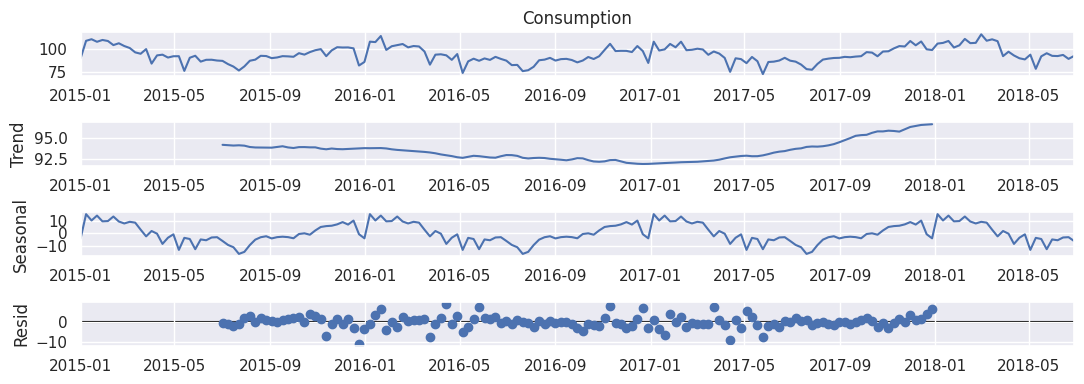

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(y_train, model='additive', period = 52)
result.plot();

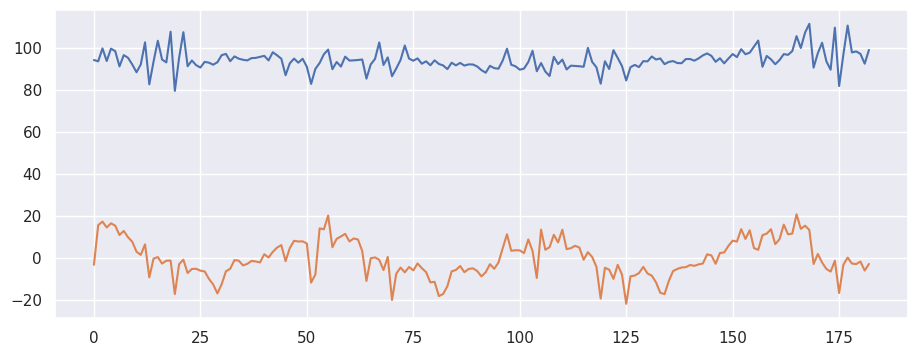

In [69]:
deseason = Deseasonalizer(model="multiplicative", sp=52)
detrend  = Detrender(forecaster=PolynomialTrendForecaster(degree=1))
plt.plot(deseason.fit_transform(y_train.values))
plt.plot(detrend.fit_transform(y_train.values))

Посмотрим на работу наиболее простого экспоненциального сглаживания с использованием разложения.

sMAPE = 0.099


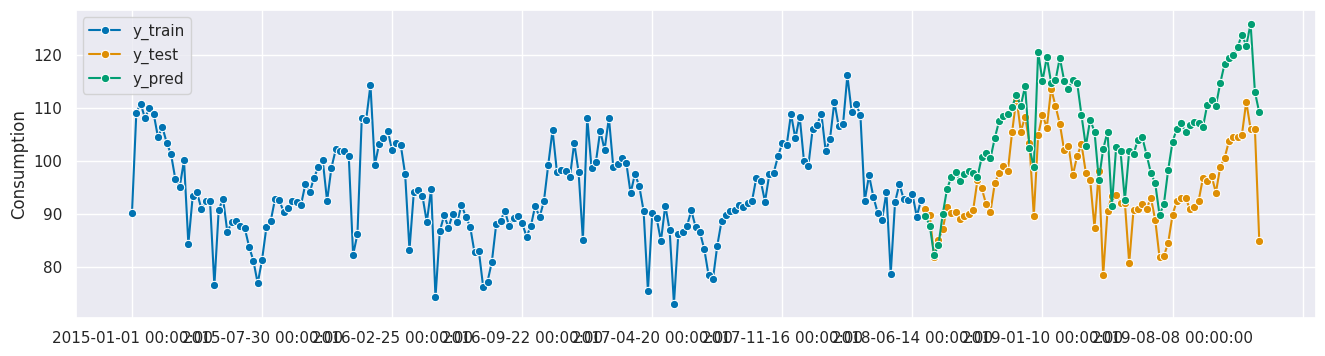

In [70]:
SEASON = 52

fh = ForecastingHorizon(y_test.index, is_relative=False)

# объек предсказатель
ses         = ExponentialSmoothing()

# пайплайн
forecaster = TransformedTargetForecaster(
                steps=[
                ("deseasonalize", Deseasonalizer(model="multiplicative", sp=SEASON)),
                ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=2))),
                ("forecaster", ses)
                ])
forecaster.fit(y_train)

# Предсказание
y_pred = forecaster.predict(fh)

# Результаты
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

**Использование пакета Scikit-learn для предсказаний**

sMAPE = 0.055


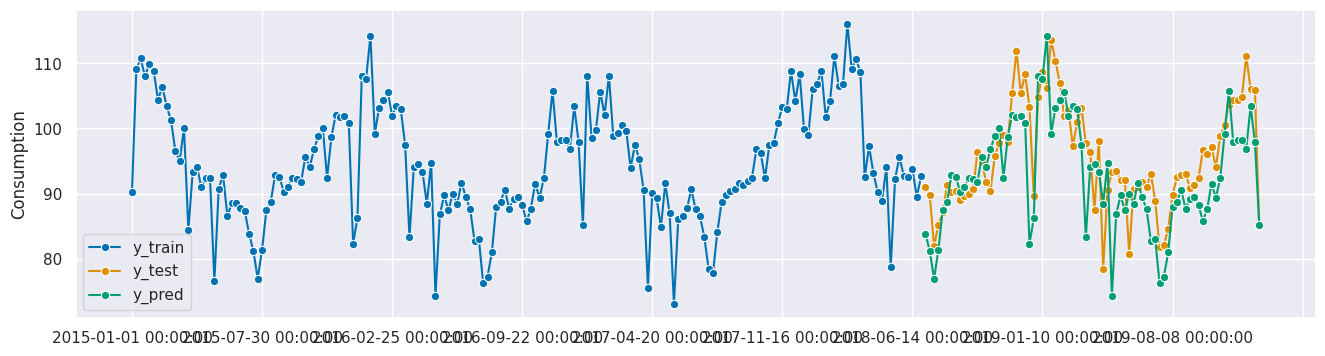

In [71]:
from sklearn.neighbors import KNeighborsRegressor

REGRESSION_WINDOW = 15

regressor  = KNeighborsRegressor(n_neighbors=1)
forecaster = make_reduction(regressor, window_length=REGRESSION_WINDOW, strategy="recursive")

forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

Регрессия с использованием пайплайна.

sMAPE = 0.103


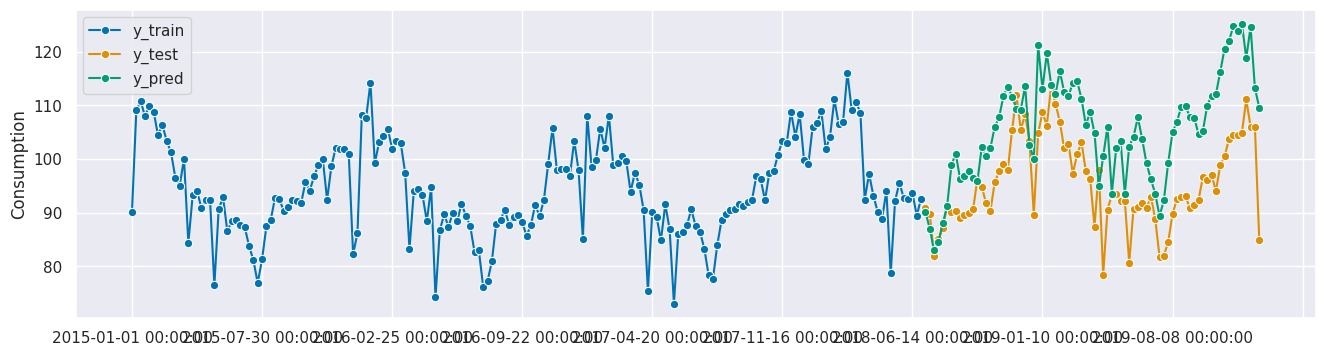

In [72]:
regressor  = KNeighborsRegressor(n_neighbors=3)

forecaster = TransformedTargetForecaster([
        ("deseasonalize", Deseasonalizer(model="multiplicative", sp=52)),
        ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=2))),
        ( "forecast", make_reduction(
                            regressor,
                            scitype="tabular-regressor",
                            window_length=REGRESSION_WINDOW,
                            strategy="recursive",)),
    ])

forecaster.fit(y_train)

y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

В некоторых случаях также можно использовать методы поиска лучших гиперпараметров

sMAPE = 0.054
Best paramters {'estimator__n_neighbors': 2, 'window_length': 10}


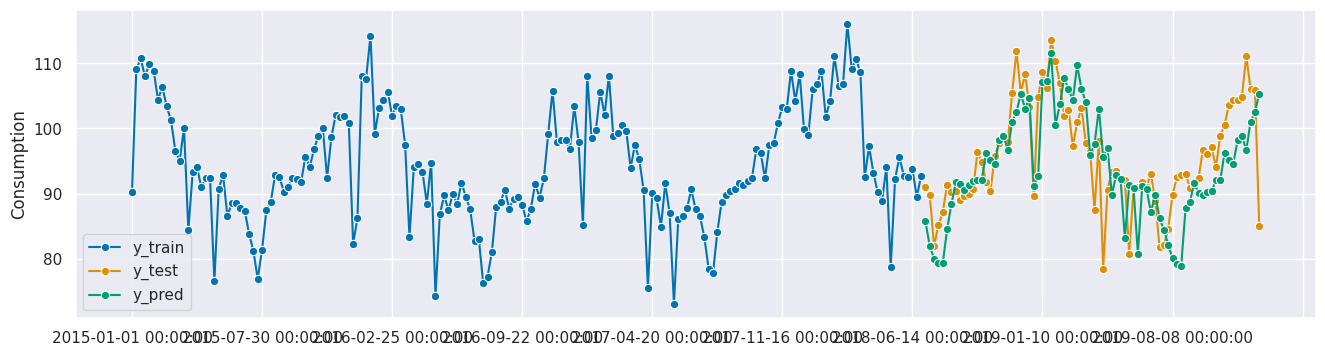

In [73]:
from sklearn.neighbors import KNeighborsRegressor

from sktime.forecasting.compose import make_reduction
from sktime.forecasting.model_selection import (
    ForecastingGridSearchCV,
    SlidingWindowSplitter,
)

param_grid = {"window_length": [10, 12, 15], "estimator__n_neighbors": [1,2,3,4]}

regressor = KNeighborsRegressor()

forecaster = make_reduction(
    regressor, scitype="tabular-regressor", strategy="recursive"
)

# Предварительные данные
cv = SlidingWindowSplitter(initial_window=int(len(y_train) * 0.7), window_length=30)
gscv = ForecastingGridSearchCV(forecaster, cv=cv, param_grid=param_grid)

gscv.fit(pd.DataFrame(y_train))

y_pred = gscv.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

print('Best paramters',gscv.best_params_)

Несколько современных методов регрессии, разработанных для временных рядов и представленных в рамках пакета `SKTime`.

sMAPE = 0.042


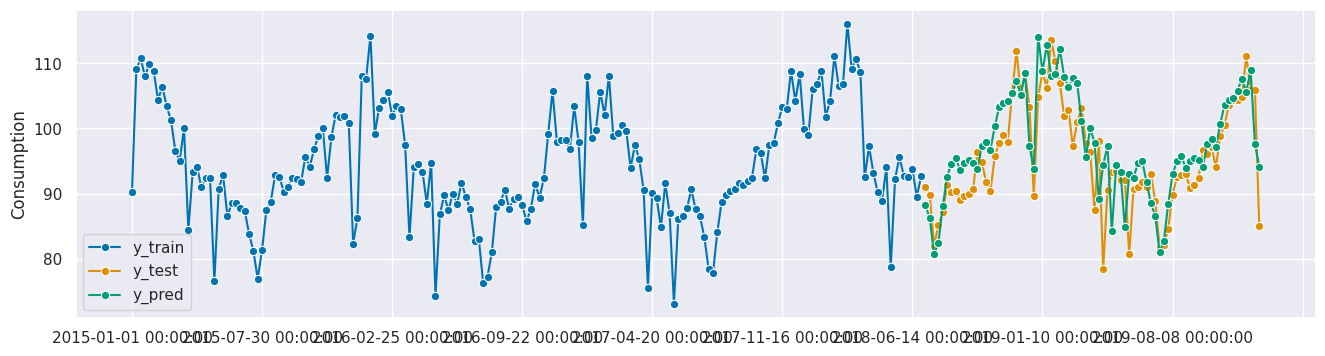

In [74]:
forecaster = ThetaForecaster(sp=SEASON)
forecaster.fit(y_train, fh=fh)
y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

TBATS - метод на основе простого преобразования временного ряда

sMAPE = 0.041


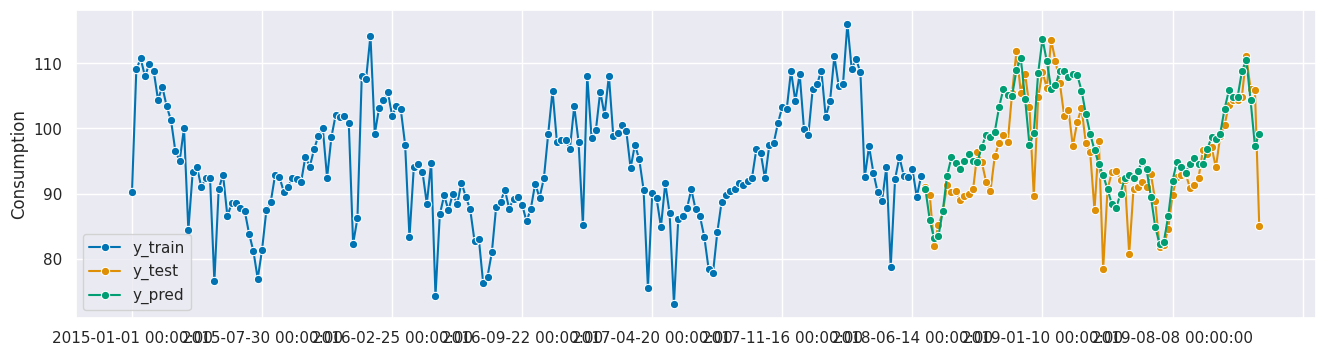

In [75]:
forecaster = TBATS(
    use_box_cox=True,
    use_trend=True,
    use_damped_trend=True,
    sp=SEASON,
    use_arma_errors=True,
    n_jobs=-1)

forecaster.fit(y_train)

fh = ForecastingHorizon(y_test.index, is_relative=False)
y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

Prophet - метод предсказания временных рядов на основе т.н. обобщенной регрессии для модели бизнес процессов, которая включает тренд с точками перегиба и насыщением, несколько компонент сезонности и редкие, но регулярные события (типа выходных дней).

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6u243z3k/dort46jt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6u243z3k/dkot2k71.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87365', 'data', 'file=/tmp/tmp6u243z3k/dort46jt.json', 'init=/tmp/tmp6u243z3k/dkot2k71.json', 'output', 'file=/tmp/tmp6u243z3k/prophet_model0xbw_bnu/prophet_model-20230509155251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:52:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:52:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


sMAPE = 0.072


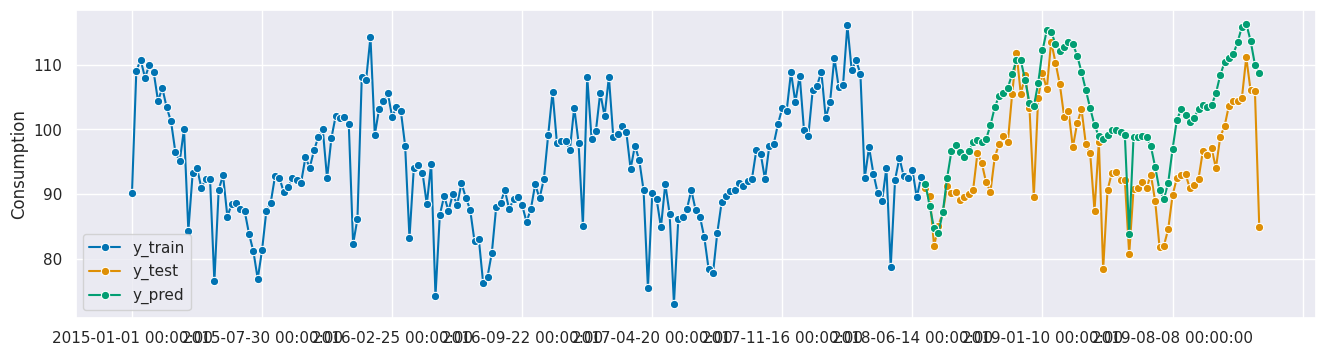

In [76]:
forecaster = Prophet(
                    seasonality_mode='additive',
                    n_changepoints=int(len(y_train) / 4),
                    add_country_holidays={'country_name': 'Germany'},
                    yearly_seasonality=True)

forecaster.fit(y_train)
fh = ForecastingHorizon(y_test.index, is_relative=False)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

Также в некоторых случаях могут быть рассмотрены предсказатели на основе выделения признаков.

In [77]:
# метод не поддерживается версией python, установленной в google colab
# ModuleNotFoundError: TSFreshFeatureExtractor requires python version to be <3.10, 
# but system python version is 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0].


# regressor = make_pipeline(
#     TSFreshFeatureExtractor(show_warnings=False, disable_progressbar=True),
#     RandomForestRegressor(),
# )

# forecaster = make_reduction(
#     regressor, scitype="time-series-regressor", window_length=15
# )
# forecaster.fit(y_train)

# fh = ForecastingHorizon(y_test.index, is_relative=False)
# y_pred = forecaster.predict(fh)

# plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
# print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

### 4. Использование моделей АРСС

In [78]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm

In [79]:
from sktime.utils.plotting import plot_series
from sktime.forecasting.sarimax import SARIMAX
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split

from sktime.performance_metrics.forecasting import  MeanAbsolutePercentageError, MeanSquaredError
smape = MeanAbsolutePercentageError(symmetric = True)
rmse  = MeanSquaredError(square_root=True)
r2_score = lambda y_pred, y_test: 1-np.sum(np.square(y_pred - y_test))/np.sum(np.square(y_test - np.mean(y_test)))

Check splitted data size: Train: 183, Test: 78


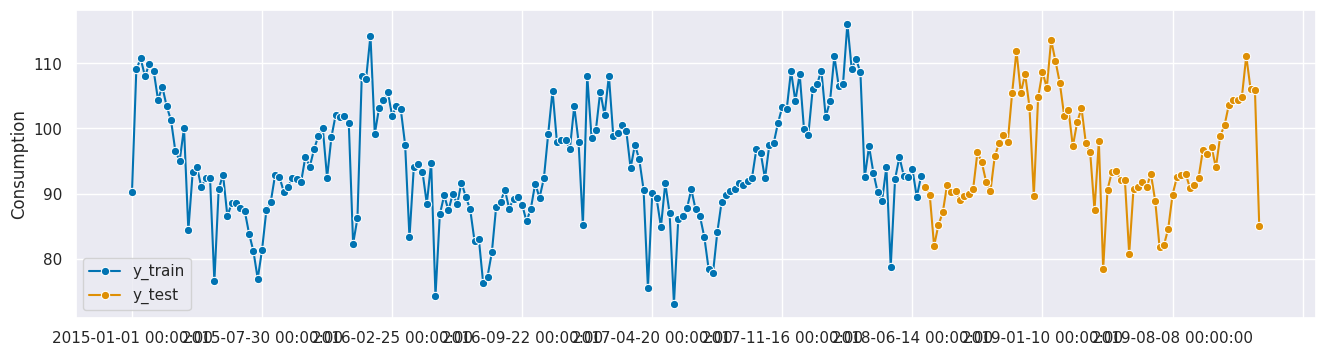

In [80]:
path_ts = 'dk_dataset.csv'

df = pd.read_csv(path_ts, parse_dates=['Date'], index_col="Date")
df=df.fillna(df.mean())

y = df.Consumption.asfreq('7d')

TEST_SIZE = int(0.3*y.size)

y_train, y_test = temporal_train_test_split(y, test_size=TEST_SIZE)

print(f'Check splitted data size: Train: {y_train.shape[0]}, Test: {y_test.shape[0]}')

sktime.utils.plotting.plot_series(y_train, y_test, labels=["y_train", "y_test"]);

**SARIMA Forecasting**

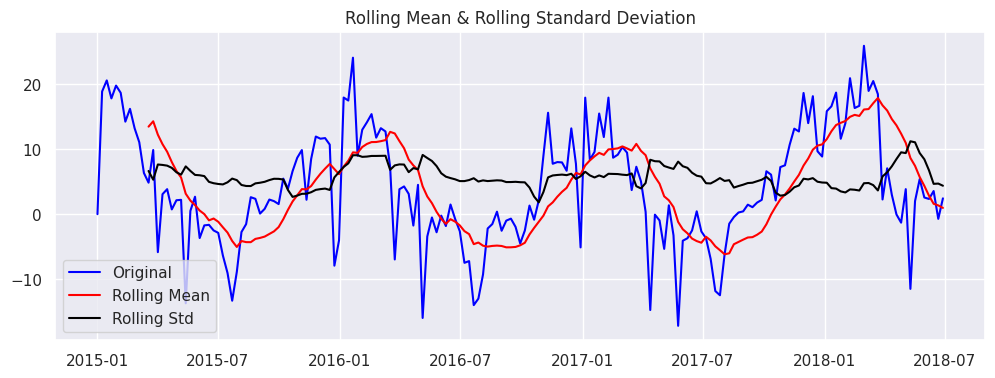

In [81]:
rolling_mean = y_train.rolling(window = 12).mean()
rolling_std  = y_train.rolling(window = 12).std()

plt.figure(figsize=(12,4), dpi=100)

plt.plot(y_train-y_train[0],      color = 'blue',  label = 'Original')
plt.plot(rolling_mean-y_train[0], color = 'red',   label = 'Rolling Mean')
plt.plot(rolling_std,             color = 'black', label = 'Rolling Std')

plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [82]:
P_THRESHOLD = 0.05
def check_ADF(y, p_threshold = P_THRESHOLD):
    result = adfuller(y)
    adf_value = result[0]
    p_value   = result[1]
    print('ADF Statistic: {:.4f}'.format(adf_value))
    print('p-value: {:.4f}'.format(p_value))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {:.4f}, {}'.format(key, value, 'outperformed' if adf_value>value else ""))    
    print(f'Result: The series is {"not " if p_value < p_threshold else ""}stationary')
    return result

check_ADF(y_train, p_threshold = P_THRESHOLD);

ADF Statistic: -3.1032
p-value: 0.0263
Critical Values:
	1%: -3.4681, outperformed
	5%: -2.8781, 
	10%: -2.5756, 
Result: The series is not stationary


В данной ситуации оказалось так, что ряд не стационарен. В этом случае стационарности можно добиться дифференцированием. Рассмотрим классической дифференцирование.

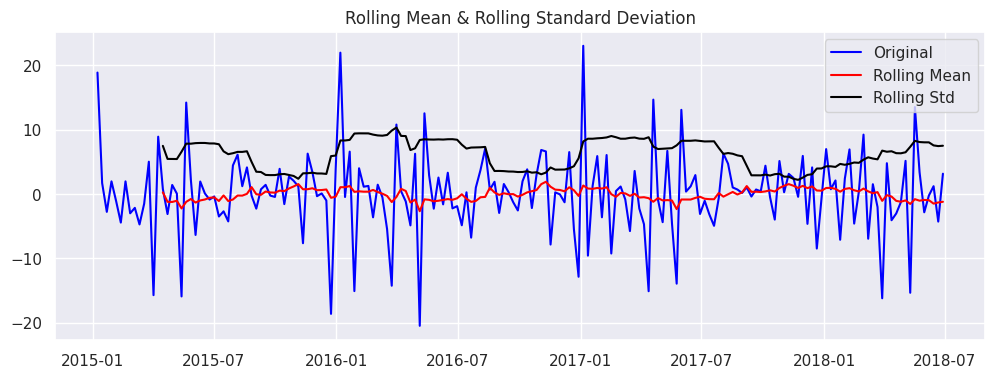

ADF Statistic: -6.3268
p-value: 0.0000
Critical Values:
	1%: -3.4681, 
	5%: -2.8781, 
	10%: -2.5756, 
Result: The series is not stationary


In [83]:
y_diff = y_train[:].diff(1).dropna()

rolling_mean = y_diff.rolling(window = 15).mean()
rolling_std  = y_diff.rolling(window = 15).std()

plt.figure(figsize=(12,4), dpi=100)

plt.plot(y_diff,       color = 'blue',  label = 'Original')
plt.plot(rolling_mean, color = 'red',   label = 'Rolling Mean')
plt.plot(rolling_std,  color = 'black', label = 'Rolling Std')

plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

result = check_ADF(y_diff)

Как и следовало ожидать (в ряду преобладает сезонная составляющая) ряд по прежнему не стационарен. 

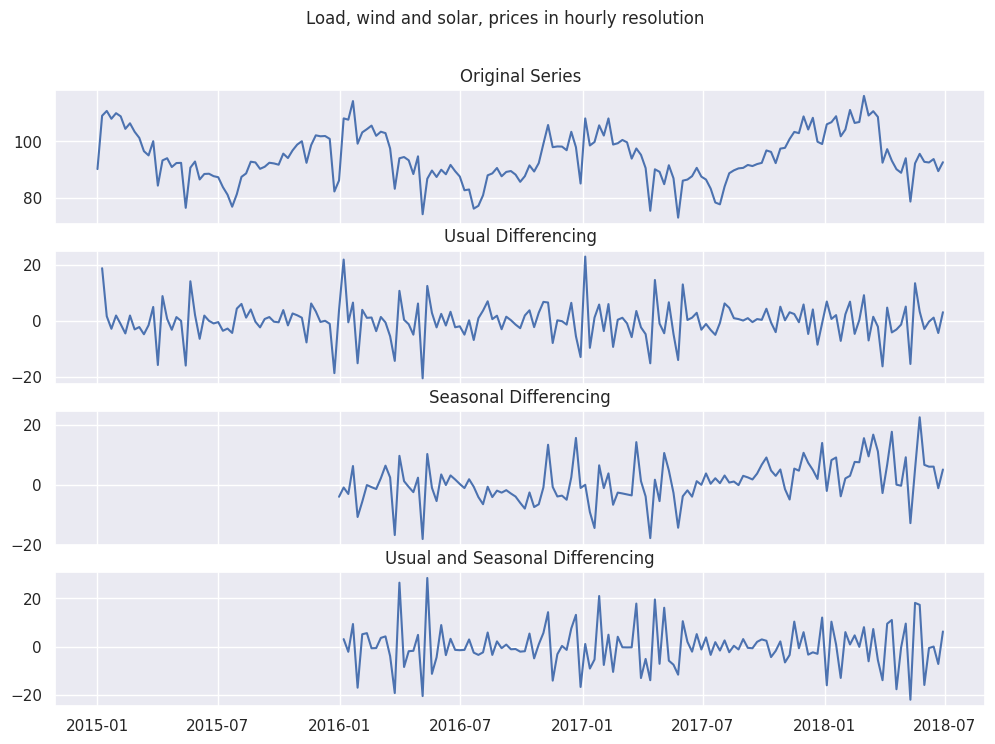

In [84]:
SEASON = 52

# Plot
fig, axes = plt.subplots(4, 1, figsize=(12,8), dpi=100, sharex=True)

# Original Series
axes[0].plot(y_train[:])
axes[0].set_title('Original Series')

# Usual Differencing
axes[1].plot(y_train[:].diff(1))
axes[1].set_title('Usual Differencing')

# Seasinal Differencing
axes[2].plot(y_train[:].diff(SEASON))
axes[2].set_title('Seasonal Differencing')

# Seasinal and Usual Differencing
axes[3].plot(y_train[:].diff(1).diff(SEASON))
axes[3].set_title('Usual and Seasonal Differencing')

plt.suptitle('Load, wind and solar, prices in hourly resolution', fontsize=12)
plt.show()

В последнем случае мы имеем более не менее стационарный случай. Проверим это при помощи теста.

In [85]:
y_sdif = y_train[:].diff(1).diff(SEASON).dropna()
results = check_ADF(y_sdif);

ADF Statistic: -6.3133
p-value: 0.0000
Critical Values:
	1%: -3.4870, 
	5%: -2.8864, 
	10%: -2.5800, 
Result: The series is not stationary


Хотя тест дал не лучшие результаты, мы можем заключить что предварительной оценкой порядков дифференцирования (интегрирования) являются: $d=1; D=1; s=52$.

После выбора порядков дифференцирования следует перейти к оценке порядков авторегрессии и скользящего среднего. Как правило, в ручную, эти параметры выбираются при помощи автокорреляционной и частичной автокорреляционной функций (`ACF` и `PACF` соответственно).

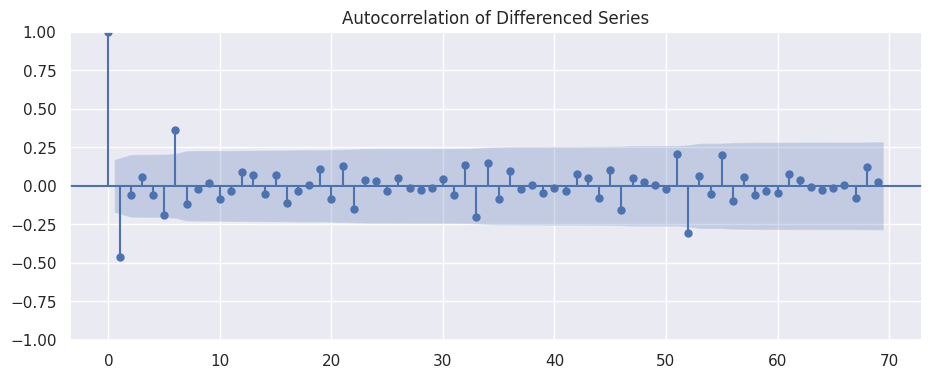

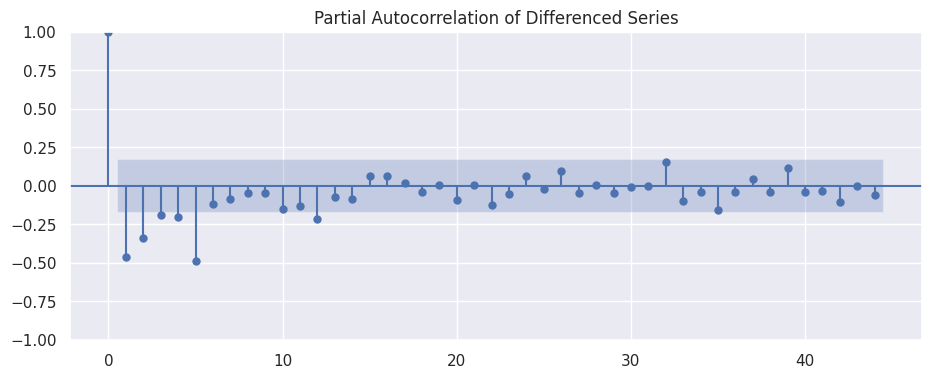

In [86]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Usual Differencing
plot_acf(y_sdif, title='Autocorrelation of Differenced Series', lags=np.arange(70) );plt.show()
# Usual Differencing
plot_pacf(y_sdif, title='Partial Autocorrelation of Differenced Series', method='ywm', lags=np.arange(45));plt.show()
plt.show();

Из графиков выше следует следующий выбор параметров.
* $2$ порядка `AR`  (1 и 2 лаги `PACF` ниже нуля); 
* $0$ порядок `MA`  (на `ACF` видна некоторая нестационарность, но 1 и 2 лаги не превысили доверительный интервал);
* $0$ порядок `SAR` (на `PACF` нет значимых лагов выше нуля);
* $0$ порядок `SMA` (на `ACF` нет значимых лагов ниже нуля);
* Ряд немного недодифференцирован, поэтому установим $3$ порядок `AR`; 

Теперь давайте проверим модель $SARIMA (3,1,0)(0,1,0)52.$

In [87]:
forecaster = SARIMAX(order=(3, 1, 0), seasonal_order=(0, 1, 0, 52))
forecaster.fit(y_train)
print(forecaster.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        Consumption   No. Observations:                  183
Model:             SARIMAX(3, 1, 0)x(0, 1, 0, 52)   Log Likelihood                -442.958
Date:                            Tue, 09 May 2023   AIC                            895.916
Time:                                    15:53:00   BIC                            910.253
Sample:                                01-01-2015   HQIC                           901.742
                                     - 06-28-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1022      0.660      0.155      0.877      -1.191       1.395
ar.L1         -0.6802      0.085   

Помимо табличного представления, мы можем проводить диагностику остатков графическим способом. Напомним, что остатки в данном контексте означают разность модели, аппроксимированной при помощи `SARIMA` и тренировочных данных.
Отметим, что данный способ не является стандартным методом класса `SARIMAX`, однако присутствует в нем.

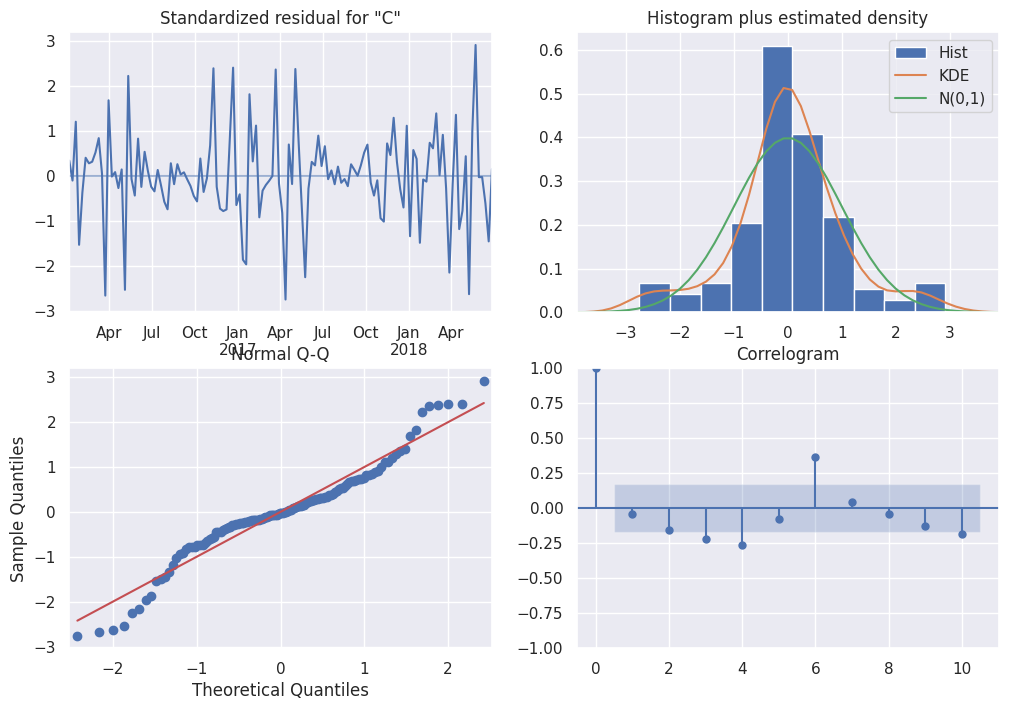

In [88]:
forecaster._fitted_forecaster.plot_diagnostics(figsize=(12,8));

На графиках выше мы видим:
* *верхний левый  график*: остаточные ошибки колеблются около нулевого среднего и имеют несколько не равномерную дисперсию, гипотеза - модель недодифференцирована.
* *верхний правый график*: остаток имеет распределение, похожее на нормальное распределение, но с некоторыми "хвостами". 
* *нижний правый график*: график `Q-Q` показывает отклонения от нормального распределения. 
* *нижний левый график*: автокорреляционная функция показывает несколько значительных (статистически значимых) отличий от нормального распределения. 

Проведенный анализ показывает, что мы можем улучшить нашу модель. При ручном поборе порядка модели следует отдавать предпочтения моделям с наименьшим значением критериев качества и с наименьшей ошибкой `RSS`.

В качестве первого предположения мы можем попытаться увеличить порядок дифференцирования модели.  После можно попробовать несколько значений разных порядков.

                                     SARIMAX Results                                      
Dep. Variable:                        Consumption   No. Observations:                  183
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 52)   Log Likelihood                -421.850
Date:                            Tue, 09 May 2023   AIC                            855.700
Time:                                    15:53:38   BIC                            872.905
Sample:                                01-01-2015   HQIC                           862.691
                                     - 06-28-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1536      0.776      0.198      0.843      -1.368       1.675
ar.L1         -0.5551      0.072   

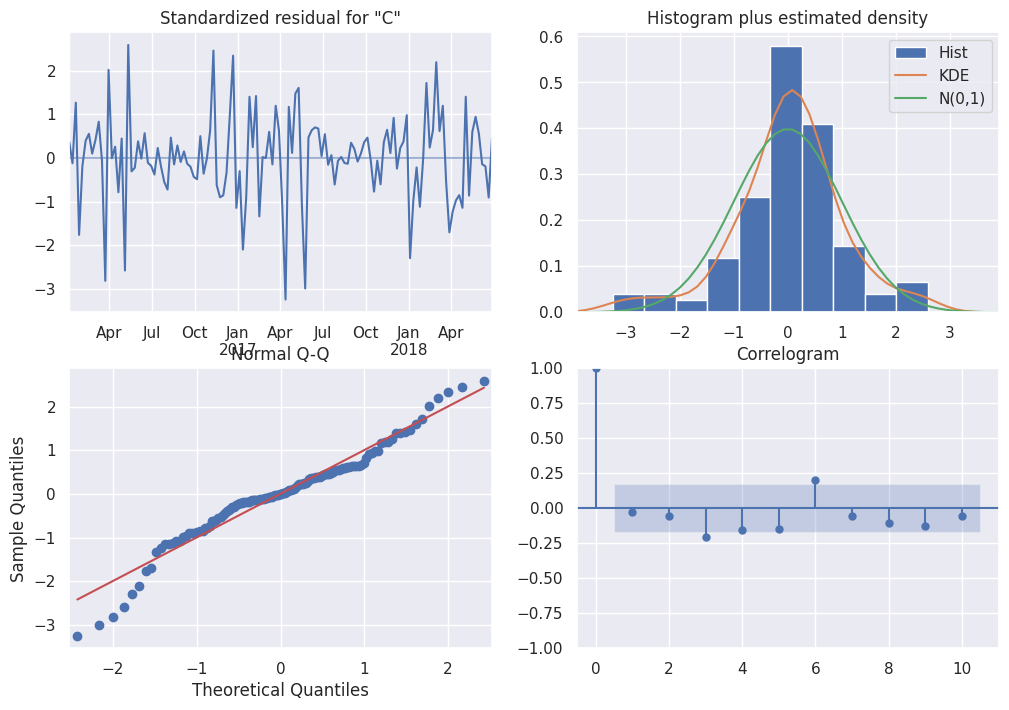

In [89]:
forecaster = SARIMAX(order=(2, 1, 0), seasonal_order=(2, 1, 0, 52))
forecaster.fit(y_train)
print(forecaster.summary())
forecaster._fitted_forecaster.plot_diagnostics(figsize=(12,8));

Теперь попробуем визуализировать предсказания нашей модели.

sMAPE = 0.061


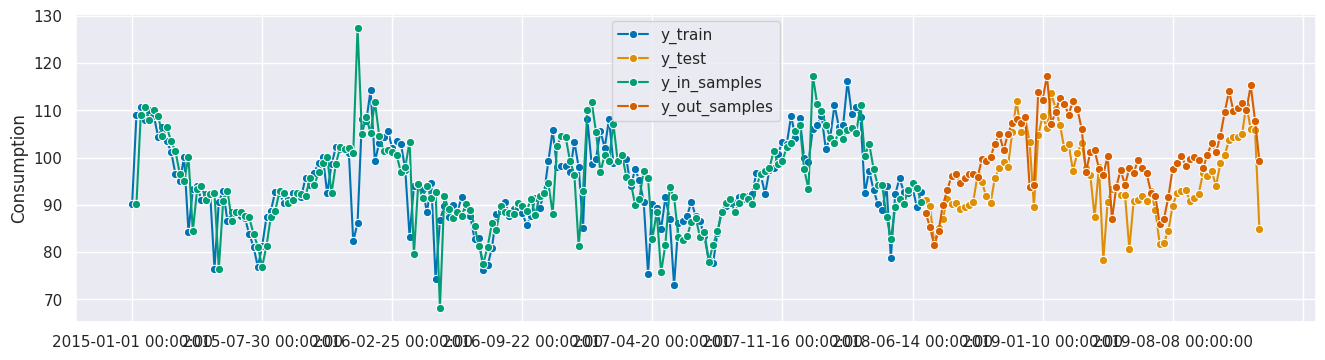

In [90]:
fhin = ForecastingHorizon(y_train.index[1:], is_relative=False)
y_in_samples = forecaster.predict(fhin)

fhout = ForecastingHorizon(y_test.index, is_relative=False)
y_out = forecaster.predict(fhout)

plot_series(y_train, y_test, y_in_samples, y_out, labels=["y_train", "y_test", "y_in_samples", "y_out_samples"])

print(f'sMAPE = {smape(y_out.values, y_test.values):.3f}')

Полученный результаты достаточно неплохо описывают модель, однако можно достичь и лучшей аппроксимации. Также важно что помимо полученных значений предсказаний важно и предсказание их дисперсии. Попробуем построить такие интервалы.

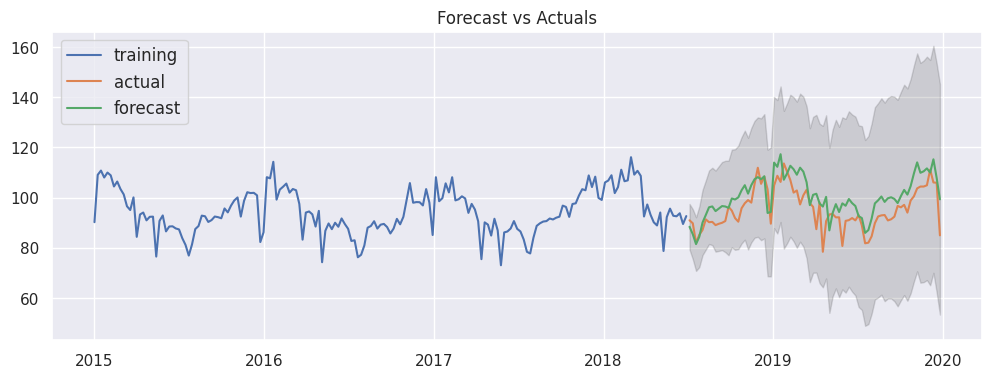

In [91]:
# Forecast
forecast_res = forecaster._fitted_forecaster.get_forecast(y_test.size, alpha=0.01, dynamic=False)  # 95% conf

forecast = forecast_res.predicted_mean

# Make as pandas series
fc_series = pd.Series(forecast.values, index=y_test.index)

lower_series = pd.Series(forecast_res.conf_int()['lower Consumption'], index=y_test.index)
upper_series = pd.Series(forecast_res.conf_int()['upper Consumption'], index=y_test.index)

# Plot
plt.figure(figsize=(12,4), dpi=100)

plt.plot(y_train, label='training')
plt.plot(y_test,  label='actual')
plt.plot(fc_series, label='forecast')

plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', 
                 alpha=0.15)

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=12)
plt.show()


Во многих случаях, помимо ручного поиска параметров `ARMA` могут быть использованы инструменты автопоиска. Мы рассмотрим один из таких инструментов в рамках пакета `SKTime` это `AutoARIMA`. Данный класс основан функциях из библиотеки [`pmdarima`](http://alkaline-ml.com/pmdarima/).

Объект класса `AutoARIMA` позволяет задать границы поиска параметров моделей, а также метод тестирования и ряд других параметров. В качестве примера давайте попробуем найти автоматическое предложение параметров.

In [92]:
# ограничимся из-за переполнения памяти в google colab параметрами: max_p=1, max_q=1, max_order = 6
model = AutoARIMA(start_p=1,  # начальный порядок AR
                  d=1,        # Порядок производной
                  start_q=0,  # начальный порядок MA
                  max_p=1,    # конечный порядок AR
                  max_q=1,    # конечный порядок MA                 
                  seasonal=True,  # Использовать SARIMA  
                  start_P=0,  # начальный порядок SAR
                  start_Q=0,  # начальный порядок SMA                 
                  D=1,        # Порядок сезонной производной
                  sp=52,      # Период сезонности
                  max_order = 6, # Максимальный порядок p+q+P+Q 
                  trace  = True,   # отчет он-лайн
                  stepwise = True, # метод ускоренного выбора параметров.
                  n_jobs = 1,      # для stepwise парралелизм не доступен.
                  error_action='ignore',  
                  suppress_warnings=True)

In [93]:
model.fit(y_train)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,1,0)[52] intercept   : AIC=912.696, Time=0.73 sec
 ARIMA(0,1,0)(0,1,0)[52] intercept   : AIC=941.472, Time=0.60 sec
 ARIMA(1,1,0)(1,1,0)[52] intercept   : AIC=893.415, Time=7.73 sec
 ARIMA(0,1,1)(0,1,1)[52] intercept   : AIC=inf, Time=18.29 sec
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=939.480, Time=0.60 sec
 ARIMA(1,1,0)(2,1,0)[52] intercept   : AIC=inf, Time=27.99 sec
 ARIMA(1,1,0)(1,1,1)[52] intercept   : AIC=inf, Time=17.72 sec
 ARIMA(1,1,0)(0,1,1)[52] intercept   : AIC=inf, Time=14.09 sec
 ARIMA(1,1,0)(2,1,1)[52] intercept   : AIC=869.442, Time=39.04 sec
 ARIMA(1,1,0)(2,1,2)[52] intercept   : AIC=871.442, Time=39.87 sec
 ARIMA(1,1,0)(1,1,2)[52] intercept   : AIC=inf, Time=66.35 sec
 ARIMA(0,1,0)(2,1,1)[52] intercept   : AIC=890.881, Time=30.72 sec
 ARIMA(1,1,1)(2,1,1)[52] intercept   : AIC=inf, Time=95.57 sec
 ARIMA(0,1,1)(2,1,1)[52] intercept   : AIC=833.911, Time=38.15 sec
 ARIMA(0,1,1)(1,1,1)[52] intercept   : AIC=inf,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  183
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 52)   Log Likelihood                -410.956
Date:                             Tue, 09 May 2023   AIC                            831.912
Time:                                     16:03:33   BIC                            846.249
Sample:                                 01-01-2015   HQIC                           837.737
                                      - 06-28-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1457      0.058      2.515      0.012       0.032       0.259
ma.L1         -0.9629      0.033    -29.412      0.000      -1.027      -0.899
ar.S.L52      -0.7140      0.126     -5.652      0.000      -0.962      -0.466
ar.S.L104     -0.5032      0.119     -4.237      0.000      -0.736      -0.270
sigma2        22.8113      3.838      5.943      0.000      15.288      30.334
===================================================================================
Ljung-Box (L1) (Q):                   1.57   Jarque-Bera (JB):                12.81
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Протестируем модель, выбранную автоматически.**

sMAPE = 0.101


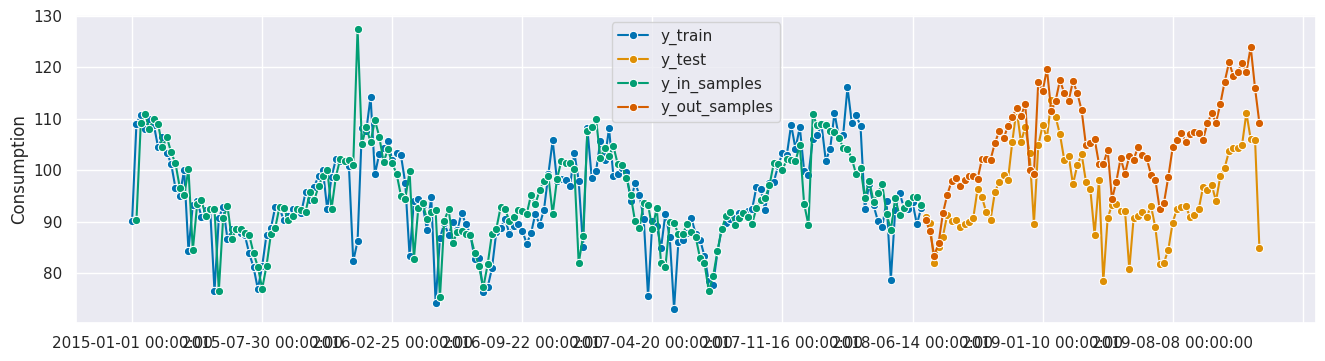

In [94]:
fhin = ForecastingHorizon(y_train.index[1:], is_relative=False)
y_in_samples = model.predict(fhin)

fhout = ForecastingHorizon(y_test.index, is_relative=False)
y_out = model.predict(fhout)

plot_series(y_train, y_test, y_in_samples, y_out, labels=["y_train", "y_test", "y_in_samples", "y_out_samples"])

print(f'sMAPE = {smape(y_out.values, y_test.values):.3f}')

Полученная модель оказалась хуже найденной вручную, что скорее всего связано с жесткими ограничениями параметров, вызванными ограниченностью расчетных ресурсов.

 В рамках пакета SKTime доступны и другие методы работы с ARMA моделями. Например, вместо поиска производных можно провести предварительное удаление сезонности данных.

sMAPE = 0.040


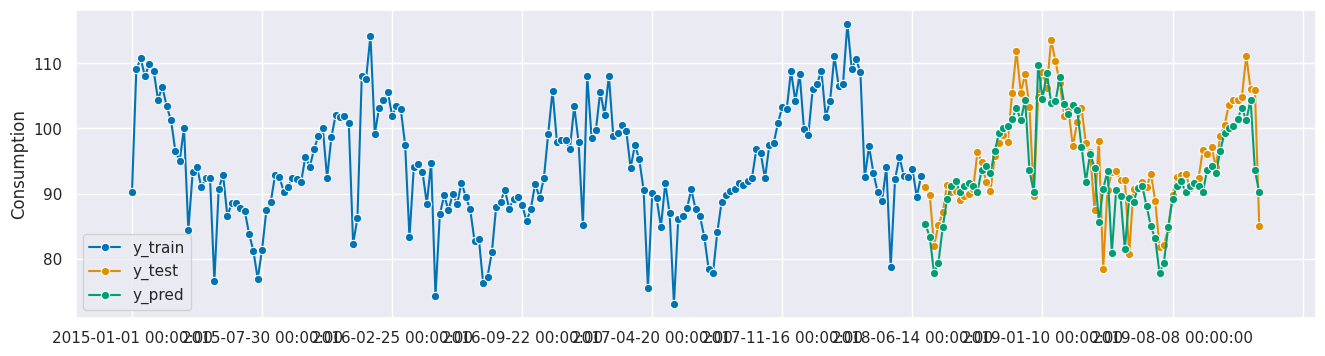

In [95]:
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.transformations.series.detrend import Deseasonalizer

forecaster = TransformedTargetForecaster(
    [
        ("deseasonalize", Deseasonalizer(model="multiplicative", sp=52)),
        ("forecast", ARIMA( order=(2, 0, 0), seasonal_order=(0, 0, 0, 0),  )),
    ]
)

forecaster.fit(y_train)

fh = ForecastingHorizon(y_test.index, is_relative=False)

y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

Точность такого результата оказывается выше на данном примере, при этом скорость обучения модели значительно увеличивается. В дополнение к этому такой подход позволяет проводить раздельно учитывать несколько сезонных составляющих в данных.

На сегодняшний день семейство моделей `ARIMA` является одним из основных методов предсказания временных рядов. Метод отлично подходит для однопеменных временных рядов. Метод хорошо работает как для рядов небольшой длительности, так и для достаточно длинных рядов. При этом метод подходит как для детерминированных, так и для случайных типа тренд. А также, само по себе описание ряда при помощи коэффициентов может быть важным признаком в ряде методов машинного обучения. 

Также отметим, что часто метод `ARIMA` сравнивается c алгоритмом `Prophet`, который в свою очередь представляет собой некоторую адоптацию обобщенной регрессии к бизнесс процессом. Алгоритм `Prophet` в некоторых случаях может давать более точные предсказания, но не всегда. Давайте сравним результаты, полученные методами `ARIMA` и `Prophet` для нашего примера.

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6u243z3k/ereo2uz_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6u243z3k/jv09kgvn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53826', 'data', 'file=/tmp/tmp6u243z3k/ereo2uz_.json', 'init=/tmp/tmp6u243z3k/jv09kgvn.json', 'output', 'file=/tmp/tmp6u243z3k/prophet_modeliw_udcu_/prophet_model-20230509160335.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:03:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:03:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


sMAPE = 0.073


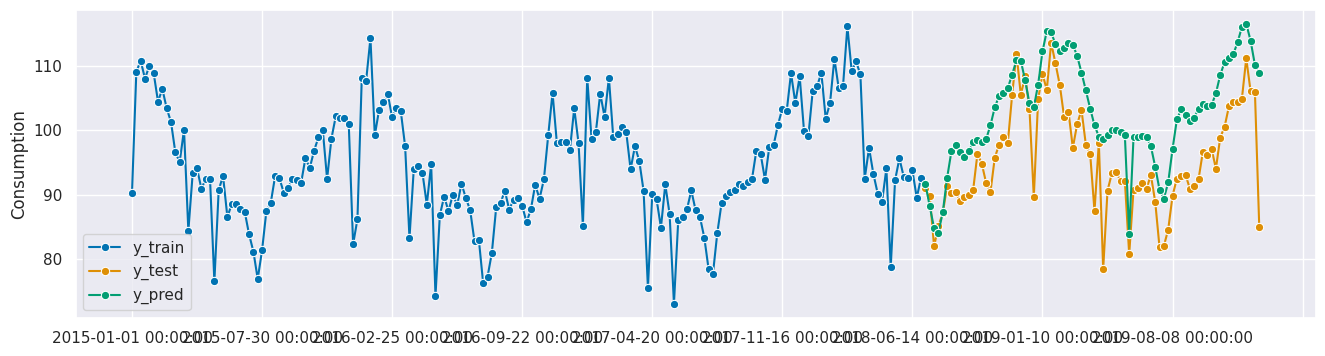

In [96]:
from sktime.forecasting.fbprophet import Prophet

forecaster = Prophet(freq='1w',
                    seasonality_mode='additive',
                    add_country_holidays={'country_name': 'Germany'},
                    yearly_seasonality=True)

forecaster.fit(y_train)
fh = ForecastingHorizon(y_test.index, is_relative=False)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
print(f'sMAPE = {smape(y_pred.values, y_test.values):.3f}')

Результат лучше, чем при автоматическом выборе параметов, но хуже, чем при ручном поиске наилучшего алгоритма